In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point, Hourly
from datetime import datetime

In [49]:
df = pd.read_csv("../data/df_agrupado.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132531 entries, 0 to 132530
Data columns (total 72 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Numero_expedient                    132531 non-null  object 
 1   Codi_districte                      132531 non-null  float64
 2   Nom_districte                       132531 non-null  object 
 3   Codi_barri                          132531 non-null  object 
 4   Nom_barri                           132531 non-null  object 
 5   Codi_carrer                         132531 non-null  float64
 6   Nom_carrer                          132529 non-null  object 
 7   Descripcio_dia_setmana              132531 non-null  object 
 8   Mes_any                             132531 non-null  float64
 9   Nom_mes                             132531 non-null  object 
 10  Dia_mes                             132531 non-null  float64
 11  Hora_dia                  

In [50]:
df["datetime"] = pd.to_datetime(df["datetime"])

In [51]:
barcelona = Point(41.3851, 2.1734)

# Rango de fechas
start = datetime(2010, 1, 1)
end = datetime(2024, 12, 31)

# Obtener datos horarios
data = Hourly(barcelona, start, end)
data = data.fetch()

# Mostrar algunas filas
print(data.head())


                     temp  dwpt  rhum  prcp  snow   wdir  wspd  wpgt   pres  \
time                                                                          
2010-01-01 00:00:00  10.8  -0.4  46.0   NaN   NaN  260.0  29.5   NaN  995.6   
2010-01-01 01:00:00  11.0   1.0  50.0   NaN   NaN  260.0  31.3   NaN    NaN   
2010-01-01 02:00:00  11.0   0.1  47.0   NaN   NaN  280.0  25.9   NaN    NaN   
2010-01-01 03:00:00   9.2  -2.1  45.0   NaN   NaN  280.0  24.1   NaN  996.9   
2010-01-01 04:00:00  10.0   0.0  50.0   NaN   NaN  250.0  22.3   NaN    NaN   

                     tsun  coco  
time                             
2010-01-01 00:00:00   NaN   NaN  
2010-01-01 01:00:00   NaN   NaN  
2010-01-01 02:00:00   NaN   NaN  
2010-01-01 03:00:00   NaN   NaN  
2010-01-01 04:00:00   NaN   NaN  


In [52]:

# Guardar en CSV (opcional)
data.to_csv("barcelona_hourly_weather_2010_2024.csv")

In [53]:
meteo = pd.DataFrame(data)
meteo[meteo["prcp"]== 0]["prcp"]

time
2010-12-11 06:00:00    0.0
2021-01-02 01:00:00    0.0
2021-01-02 02:00:00    0.0
2021-01-02 03:00:00    0.0
2021-01-02 04:00:00    0.0
                      ... 
2024-12-30 20:00:00    0.0
2024-12-30 21:00:00    0.0
2024-12-30 22:00:00    0.0
2024-12-30 23:00:00    0.0
2024-12-31 00:00:00    0.0
Name: prcp, Length: 31861, dtype: float64

In [54]:
df["Numero_lesionats_greus"].value_counts()

Numero_lesionats_greus
0.0    129462
1.0      2896
2.0       151
3.0        19
4.0         2
6.0         1
Name: count, dtype: int64

In [55]:
df["Numero_lesionats_lleus"].value_counts()

Numero_lesionats_lleus
1.0     93645
2.0     19791
0.0     13641
3.0      3450
4.0      1155
5.0       444
6.0       213
7.0        88
8.0        47
9.0        21
10.0       12
12.0        8
11.0        7
13.0        3
14.0        2
25.0        2
15.0        1
21.0        1
Name: count, dtype: int64

In [56]:
df[df["Numero_lesionats_lleus"] > 9]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
3798,2024S004227,4.0,Les Corts,20,la Maternitat i Sant Ramon,343903.0,Corts,Diumenge,7.0,Juliol,...,0,0,1,0,0,0,0,0,1,0
7042,2023S000326,9.0,Sant Andreu,61,la Sagrera,140407.0,Garcilaso / Sant Antoni Maria Claret ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
10225,2023S003564,2.0,Eixample,6,la Sagrada Família,350308.0,València ...,Dijous,6.0,Juny,...,0,1,0,1,0,0,0,0,0,0
12208,2023S005573,10.0,Sant Martí,65,el Clot,209900.0,Meridiana / València ...,Dijous,9.0,Setembre,...,0,1,0,1,0,0,0,0,0,0
14764,2022S002794,3.0,Sants-Montjuïc,11,el Poble-sec,198804.0,Paral·lel / Entença ...,Dimarts,5.0,Maig,...,0,1,0,0,0,1,0,0,0,0
16018,2022S006464,5.0,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,701268.0,Isaac Newton / Tibidabo ...,Dimecres,10.0,Octubre,...,1,1,0,0,0,0,1,0,0,0
24146,2021S002991,8.0,Nou Barris,44,Vilapicina i la Torre Llobeta,119003.0,Fabra i Puig,Dissabte,6.0,Juny,...,0,0,1,0,0,0,0,1,0,0
24399,2021S003925,2.0,Eixample,8,l'Antiga Esquerra de l'Eixample,32700.0,Balmes,Dimecres,7.0,Juliol,...,0,1,0,0,0,0,1,0,0,0
33735,2020S003876,10.0,Sant Martí,104-10-69,Diagonal Mar i el Front Marítim del Poblenou,701266.0,Litoral (Llobregat),Diumenge,8.0,Agost,...,0,0,1,0,0,0,0,0,1,0
37209,2019S001085,2.0,Eixample,8,l'Antiga Esquerra de l'Eixample,144601.0,Diagonal / Balmes ...,Dilluns,2.0,Febrer,...,0,1,0,0,1,0,0,0,0,0


In [57]:
df[(df["Numero_lesionats_lleus"] == 3) & (df["Numero_victimes"] == 3)]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
4,2024S000005,4.0,Les Corts,19,les Corts,231502.0,Numància,Dilluns,1.0,Gener,...,0,0,1,0,1,0,0,0,0,0
5,2024S000006,8.0,Nou Barris,50,les Roquetes,700652.0,Torre Baró,Dilluns,1.0,Gener,...,0,0,1,0,1,0,0,0,0,0
86,2024S000095,8.0,Nou Barris,53,la Trinitat Nova,209900.0,Meridiana,Diumenge,1.0,Gener,...,0,0,1,0,0,0,0,0,1,0
211,2024S000232,2.0,Eixample,7,la Dreta de l'Eixample,305100.0,Sant Joan,Dissabte,1.0,Gener,...,0,0,1,0,0,0,0,1,0,0
262,2024S000286,8.0,Nou Barris,50,les Roquetes,701501.0,B-20 (Llobregat),Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132351,2010S008815,5.0,Sarrià-Sant Gervasi,23,Sarrià,701267.0,Dalt (Besòs),Dimarts,12.0,Desembre,...,1,1,0,0,0,1,0,0,0,0
132353,2010S006800,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Dimecres,10.0,Octubre,...,1,1,0,0,0,0,1,0,0,0
132497,2010S006640,8.0,Nou Barris,46,el Turó de la Peira,103003.0,Doctor Pi i Molist,Dijous,9.0,Setembre,...,0,1,0,1,0,0,0,0,0,0
132501,2010S004144,9.0,Sant Andreu,62,el Congrés i els Indians,121402.0,Felip II,Dilluns,6.0,Juny,...,0,1,0,0,1,0,0,0,0,0


In [58]:
df[(df["Numero_lesionats_lleus"] == 0) & (df["Numero_lesionats_greus"] == 0) & (df["Numero_morts"] == 0)]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
6719,2023S000002,7.0,Horta-Guinardó,33,el Baix Guinardó,109203.0,Encarnació ...,Diumenge,1.0,Gener,...,0,0,1,0,0,0,0,0,1,0
6748,2023S000032,4.0,Les Corts,21,Pedralbes,333400.0,González Tablas / Cavallers ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
6753,2023S000037,6.0,Gràcia,31,la Vila de Gràcia,344101.0,Gràcia ...,Dimarts,1.0,Gener,...,0,1,0,0,0,1,0,0,0,0
6768,2023S000052,10.0,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,30409.0,Bac de Roda / Diagonal ...,Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
6779,2023S000063,10.0,Sant Martí,66,el Parc i la Llacuna del Poblenou,169409.0,Corts Catalanes / Ciutat de Granada ...,Dimecres,1.0,Gener,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132495,2010S008174,8.0,Nou Barris,44,Vilapicina i la Torre Llobeta,194406.0,Maragall,Diumenge,11.0,Novembre,...,0,0,1,0,0,0,0,0,1,0
132498,2010S008401,8.0,Nou Barris,45,Porta,356905.0,Verdum,Dilluns,12.0,Desembre,...,0,0,1,0,1,0,0,0,0,0
132503,2010S002760,9.0,Sant Andreu,61,la Sagrera,39709.0,Berenguer de Palou,Divendres,4.0,Abril,...,0,1,0,0,0,0,0,0,0,1
132505,2010S008859,9.0,Sant Andreu,62,el Congrés i els Indians,121402.0,Felip II,Dimecres,12.0,Desembre,...,0,1,0,0,0,0,1,0,0,0


In [59]:
df[df["Numero_morts"] == 3]

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Sarrià-Sant Gervasi,Laborable,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
83520,2015S007037,4.0,Les Corts,21.0,Pedralbes,115400.0,Esplugues,Dissabte,9.0,Setembre,...,0,0,1,0,0,0,0,1,0,0
120008,2011S000773,5.0,Sarrià-Sant Gervasi,23,Sarrià,278007.0,Reina Elisenda de Montcada,Dissabte,2.0,Febrer,...,1,0,1,0,0,0,0,1,0,0


In [60]:
met = np.log(10*df["Numero_morts"] + 2*df["Numero_lesionats_greus"] + 0.5*df["Numero_lesionats_lleus"] + 0.5*df["Numero_vehicles_implicats"] + 1)

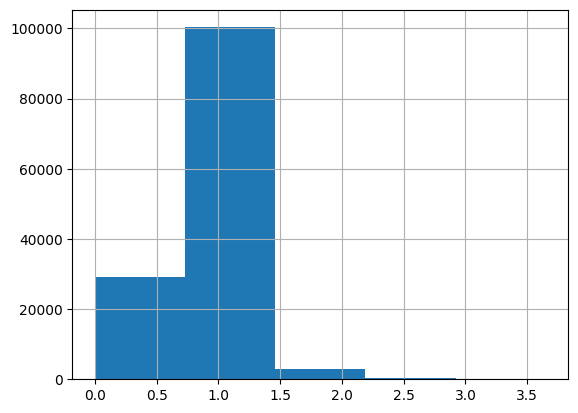

In [61]:
met.hist(bins = 5);

In [62]:
df["Metrica"] = met

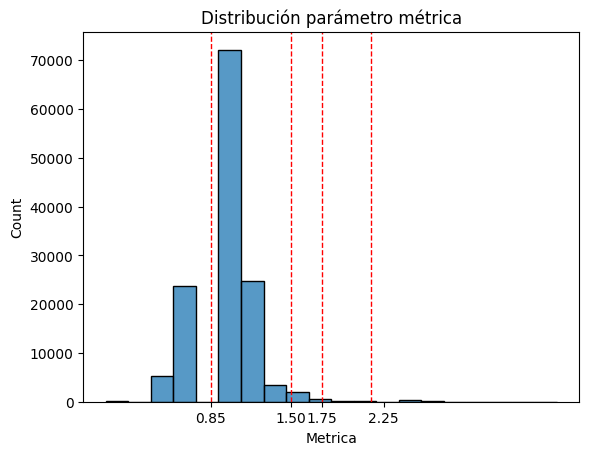

In [63]:
sns.histplot(df["Metrica"],bins = 20)
plt.axvline(0.85, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(1.5, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(1.75, color = "red", linewidth = 1, linestyle = "dashed")
plt.axvline(2.15, color = "red", linewidth = 1, linestyle = "dashed")
plt.title("Distribución parámetro métrica")
plt.xticks([0.85,1.5,1.75,2.25]);

In [64]:
def classifica5(val):
    if val < 0.85:
        return 0
    elif val < 1.5:
        return 1
    elif val < 1.75:
        return 2
    elif val < 2.15:
        return 3
    else:
        return 4

In [65]:
mapa = []
for i in met:
    mapa.append(classifica5(i))

#mapa

In [66]:
df["Grau_emergencia"] = mapa

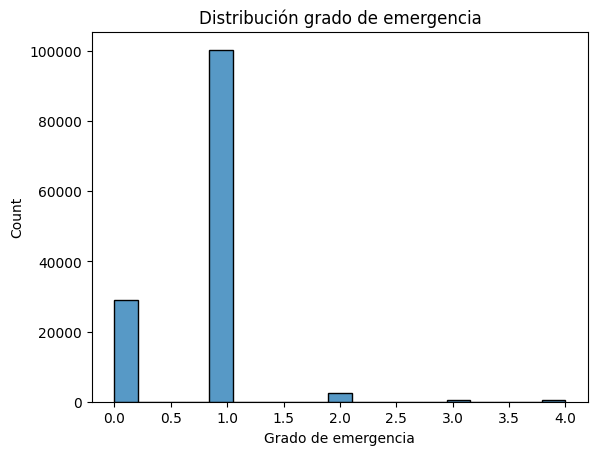

In [67]:
sns.histplot(df["Grau_emergencia"])
plt.xlabel("Grado de emergencia")
plt.title("Distribución grado de emergencia");

In [68]:
grouped = df.groupby("Grau_emergencia")[["Grau_emergencia","Numero_morts","Numero_lesionats_greus","Numero_lesionats_lleus","Numero_vehicles_implicats"]].mean(["Numero_morts","Numero_lesionats_greus","Numero_lesionats_lleus","Numero_vehicles_implicats"])
grouped

,Grau_emergencia,Numero_morts,Numero_lesionats_greus,Numero_lesionats_lleus,Numero_vehicles_implicats
Grau_emergencia,,,,,
0,0.0,0.000000,0.000000,0.665426,1.146766
1,1.0,0.000000,0.021913,1.244300,2.076405
2,2.0,0.000000,0.298171,2.899617,3.456827
3,3.0,0.000000,0.588358,4.101871,4.627859
4,4.0,0.919571,0.233244,1.099196,2.292225


In [69]:
grouped.columns

Index(['Grau_emergencia', 'Numero_morts', 'Numero_lesionats_greus',
       'Numero_lesionats_lleus', 'Numero_vehicles_implicats'],
      dtype='object')

In [70]:
melted = grouped.melt(id_vars="Grau_emergencia", value_vars=grouped.columns[1:],var_name="variable")
melted

,Grau_emergencia,variable,value
0,0.0,Numero_morts,0.000000
1,1.0,Numero_morts,0.000000
2,2.0,Numero_morts,0.000000
3,3.0,Numero_morts,0.000000
4,4.0,Numero_morts,0.919571
5,0.0,Numero_lesionats_greus,0.000000
6,1.0,Numero_lesionats_greus,0.021913
7,2.0,Numero_lesionats_greus,0.298171
8,3.0,Numero_lesionats_greus,0.588358
9,4.0,Numero_lesionats_greus,0.233244


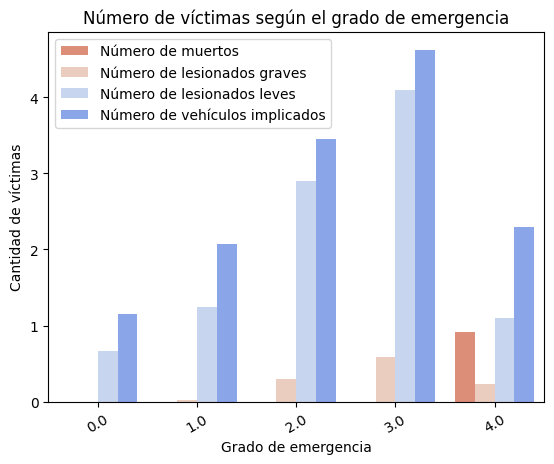

In [71]:
sns.barplot(data = melted,x ="Grau_emergencia", y = "value",hue = "variable",errorbar=None,palette="coolwarm_r")
plt.xlabel("Grado de emergencia")
plt.ylabel("Cantidad de víctimas")
plt.legend(["Número de muertos","Número de lesionados graves","Número de lesionados leves","Número de vehículos implicados"])
plt.title("Número de víctimas según el grado de emergencia")
plt.xticks(rotation = 30);

In [72]:
df[df["Grau_emergencia"] >= 2].sort_values("Numero_morts")

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres,Metrica,Grau_emergencia
2,2024S000003,2.0,Eixample,10,Sant Antoni,169409.0,Corts Catalanes,Dilluns,1.0,Gener,...,1,0,1,0,0,0,0,0,1.791759,3
131636,2010S002885,2.0,Eixample,7,la Dreta de l'Eixample,89004.0,Consell de Cent,Dijous,4.0,Abril,...,0,1,0,0,0,0,0,0,1.504077,2
131666,2010S004641,2.0,Eixample,6,la Sagrada Família,161407.0,Indústria,Dissabte,7.0,Juliol,...,1,0,0,0,0,1,0,0,1.504077,2
131729,2010S007782,4.0,Les Corts,19,les Corts,63703.0,Caravel·la La Niña,Dilluns,11.0,Novembre,...,0,0,1,0,0,0,0,0,2.197225,4
126125,2010S001271,5.0,Sarrià-Sant Gervasi,25,Sant Gervasi - la Bonanova,101008.0,Tibidabo,Dissabte,2.0,Febrer,...,1,0,0,0,0,1,0,0,1.504077,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113426,2012S006131,5.0,Sarrià-Sant Gervasi,27,el Putxet i el Farró,143904.0,General Mitre,Dimecres,8.0,Agost,...,0,0,0,0,1,0,0,0,3.091042,4
122854,2011S005673,7.0,Horta-Guinardó,37,el Carmel,85900.0,Conca de Tremp,Divendres,8.0,Agost,...,0,0,0,0,0,0,0,1,3.068053,4
123150,2011S002627,2.0,Eixample,7,la Dreta de l'Eixample,90502.0,Còrsega,Divendres,4.0,Abril,...,0,0,0,0,0,0,0,1,3.091042,4
83520,2015S007037,4.0,Les Corts,21.0,Pedralbes,115400.0,Esplugues,Dissabte,9.0,Setembre,...,1,0,0,0,0,1,0,0,3.650658,4


In [73]:
bardf = df.loc[:,"Abast":'Xoc contra element estàtic']
bardf.reset_index(drop=True)
melted_bar = bardf.melt()
melted_bar


,variable,value
0,Abast,0
1,Abast,1
2,Abast,0
3,Abast,0
4,Abast,0
...,...,...
2385553,Xoc contra element estàtic,0
2385554,Xoc contra element estàtic,0
2385555,Xoc contra element estàtic,0
2385556,Xoc contra element estàtic,0


In [74]:
melted_bar.groupby("variable")[["value"]].std()

,value
variable,
Abast,0.408308
Abast multiple,0.178034
Altres_Vehicle,0.166244
Atropellament,0.326433
Bolcada (més de dues rodes),0.055399
Caiguda (dues rodes),0.293753
Caiguda interior vehicle,0.176721
Col.lisió frontal,0.123168
Col.lisió fronto-lateral,0.391448


In [75]:
grouped_bar  = melted_bar.groupby("variable")[["value"]].sum()
grouped_bar.sort_values(by = "value",inplace=True,ascending=False)
grouped_bar

,value
variable,
Col.lisió lateral,31064
Abast,28018
Col.lisió fronto-lateral,25038
Atropellament,16071
Caiguda (dues rodes),12642
Xoc contra element estàtic,10361
Abast multiple,4343
Caiguda interior vehicle,4277
Altres_Vehicle,3770


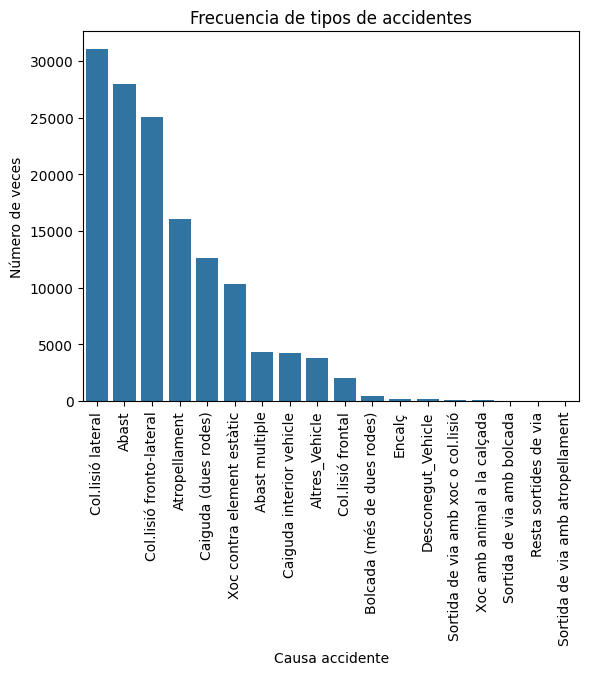

In [76]:
sns.barplot(grouped_bar,x = "variable", y = "value")
plt.xlabel("Causa accidente")
plt.ylabel("Número de veces")
plt.title("Frecuencia de tipos de accidentes")
plt.xticks(rotation = "vertical");


In [77]:
intento = df.copy()


In [78]:
df["Abast"].value_counts()


Abast
0    104513
1     28018
Name: count, dtype: int64

In [79]:
intento.groupby("Abast")["Metrica"].mean()


Abast
0    0.913766
1    0.981126
Name: Metrica, dtype: float64

In [80]:
intento["Abast"].value_counts()


Abast
0    104513
1     28018
Name: count, dtype: int64

In [81]:
for col in bardf.columns:
    intento[col] = np.where(intento[col] == 1,intento.groupby(col)["Metrica"].transform("mean"),0)

intento.loc[:,bardf.columns]

,Abast,Abast multiple,Altres_Vehicle,Atropellament,Bolcada (més de dues rodes),Caiguda (dues rodes),Caiguda interior vehicle,Col.lisió frontal,Col.lisió fronto-lateral,Col.lisió lateral,Desconegut_Vehicle,Encalç,Resta sortides de via,Sortida de via amb atropellament,Sortida de via amb bolcada,Sortida de via amb xoc o col.lisió,Xoc amb animal a la calçada,Xoc contra element estàtic
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.841248,0.0,0.0,0.000000
1,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.001103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.702131
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.001103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132526,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.967379,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132527,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132528,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132529,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.967379,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [82]:
intento = intento.loc[:,bardf.columns].max()

In [83]:
intento = pd.DataFrame(intento)
intento.rename(columns={0:"Metrica"},inplace=True)
intento.reset_index(inplace=True)
intento.sort_values(by ="Metrica", ascending=False, inplace=True)

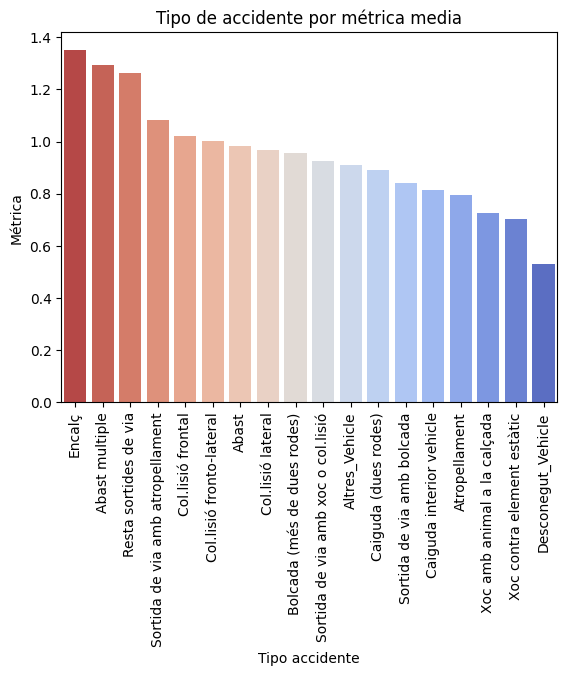

In [84]:
sns.barplot(intento, x = "index", y = "Metrica", hue = "index",errorbar=None, palette = "coolwarm_r")
plt.xlabel("Tipo accidente")
plt.ylabel("Métrica")
plt.title("Tipo de accidente por métrica media")
plt.xticks(rotation = "vertical");
# sns.barplot(bardf, x = "index",y = "Metrica",hue = "index")

In [85]:
for col in bardf.columns:
    df[col] = np.where(df[col] == 1,df.groupby(col)["Metrica"].transform("mean"),0)

df.loc[:,bardf.columns]

,Abast,Abast multiple,Altres_Vehicle,Atropellament,Bolcada (més de dues rodes),Caiguda (dues rodes),Caiguda interior vehicle,Col.lisió frontal,Col.lisió fronto-lateral,Col.lisió lateral,Desconegut_Vehicle,Encalç,Resta sortides de via,Sortida de via amb atropellament,Sortida de via amb bolcada,Sortida de via amb xoc o col.lisió,Xoc amb animal a la calçada,Xoc contra element estàtic
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.841248,0.0,0.0,0.000000
1,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.001103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.702131
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.001103,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132526,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.967379,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132527,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132528,0.981126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
132529,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.967379,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [86]:
df.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Descripcio_dia_setmana',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus',
       'Numero_victimes', 'Numero_vehicles_implicats', 'Coordenada_UTM_Y',
       'Coordenada_UTM_X', 'Longitud', 'Latitud', 'Descripcio_tipus_dia',
       'Any', 'datetime', 'Altres', 'Creuar per fora pas de vianants',
       'Desconegut', 'Desobeir altres senyals',
       'Desobeir el senyal del semàfor', 'No és causa del vianant',
       'Transitar a peu per la calçada', 'Abast', 'Abast multiple',
       'Altres_Vehicle', 'Atropellament', 'Bolcada (més de dues rodes)',
       'Caiguda (dues rodes)', 'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atrope

In [87]:
vianant = df.loc[:,"Altres":"Transitar a peu per la calçada"]

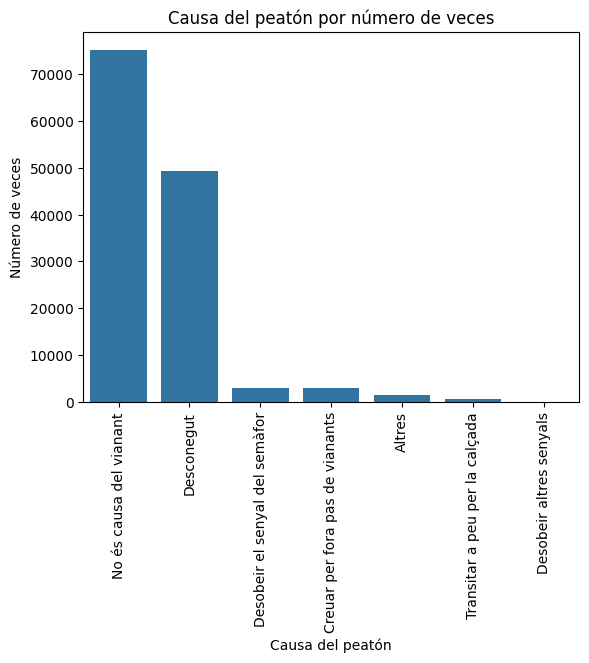

In [88]:
vianant.reset_index(drop=True)
melted_via = vianant.melt()
grouped_via  = melted_via.groupby("variable")[["value"]].sum()
grouped_via.sort_values(by = "value",inplace=True,ascending=False)
# grouped_via
sns.barplot(grouped_via,x = "variable", y = "value")
plt.xlabel("Causa del peatón")
plt.ylabel("Número de veces")
plt.title("Causa del peatón por número de veces")
plt.xticks(rotation = "vertical");

In [89]:
for col in vianant.columns:
    df[col] = np.where(df[col] == 1,df.groupby(col)["Metrica"].transform("mean"),0)

df.loc[:,vianant.columns]

,Altres,Creuar per fora pas de vianants,Desconegut,Desobeir altres senyals,Desobeir el senyal del semàfor,No és causa del vianant,Transitar a peu per la calçada
0,0.0,0.0,0.000000,0.0,0.0,0.933014,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.933014,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.933014,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.933014,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.933014,0.0
...,...,...,...,...,...,...,...
132526,0.0,0.0,0.938545,0.0,0.0,0.000000,0.0
132527,0.0,0.0,0.938545,0.0,0.0,0.000000,0.0
132528,0.0,0.0,0.938545,0.0,0.0,0.000000,0.0
132529,0.0,0.0,0.938545,0.0,0.0,0.000000,0.0


In [90]:
vianant = df.loc[:,vianant.columns].max()

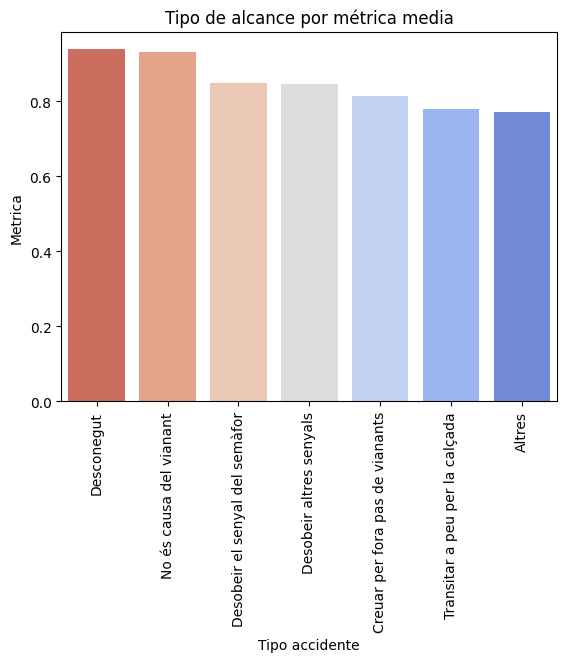

In [91]:
vianant = pd.DataFrame(vianant)
vianant.rename(columns={0:"Metrica"},inplace=True)
vianant.reset_index(inplace=True)
vianant.sort_values(by ="Metrica", ascending=False, inplace=True)
sns.barplot(vianant, x = "index", y = "Metrica", hue = "index",errorbar=None, palette = "coolwarm_r")
plt.xlabel("Tipo accidente")
plt.title("Tipo de alcance por métrica media")
plt.xticks(rotation = "vertical");
# sns.barplot(bardf, x = "index",y = "Metrica",hue = "index")

### 1.2. Agrupamos tipos de accidente y tipos de causa de peatón

In [92]:
df.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Descripcio_dia_setmana',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus',
       'Numero_victimes', 'Numero_vehicles_implicats', 'Coordenada_UTM_Y',
       'Coordenada_UTM_X', 'Longitud', 'Latitud', 'Descripcio_tipus_dia',
       'Any', 'datetime', 'Altres', 'Creuar per fora pas de vianants',
       'Desconegut', 'Desobeir altres senyals',
       'Desobeir el senyal del semàfor', 'No és causa del vianant',
       'Transitar a peu per la calçada', 'Abast', 'Abast multiple',
       'Altres_Vehicle', 'Atropellament', 'Bolcada (més de dues rodes)',
       'Caiguda (dues rodes)', 'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atrope

In [93]:
# df["Xoc"] = (df[""] + df[""])

## Dividiremos los modelos en dos partes

El grado de emergencia está muy descompensado, como cabría esperar, los dos primeros niveles (donde no hay víctimas mortales y apenas lesionados graves) suponen cerca del 97,5% de la muestra, mientras que los otros tres niveles recogen 3200 registros de los más de 130000.

1. Entrenaremos primero un modelo de clasificación que determine si un accidente entra en una de las categorías de menor siniestralidad o no.

2. Una vez clasificados, entrenaremos modelos para clasificar en los subniveles de emergencia dentro de cada grupo (baja y media para el grupo 1 y alta, muy alta y máxima para el grupo 2).

    2.1. Por la naturaleza de la categoría máxima, se sobreentenderá que ha habido al menos un fallecido.

3. Plus: Entrenar una red neuronal que divida el número de víctimas en las tres categorías (heridos leves, heridos graves, fallecidos). **Importante:** Pasar como feature número de personas afectadas y reinterpretar la probabilidad de salida para repartir el número de afectados en las tres clases. 

4. Plus+: Mediante distribución de Poison, a partir de la métrica, generar pseudoexpermientos a partir del parámetro $\lambda$ de número de afectados de cada categoria por hora en cada agrupación. Generar 1.000.000 eventos para ver cuántos de estos escenarios pertenecen a los grados 4 y 5 y hacer una estimación sencilla de los recursos de los que se disponen para atender estos sucesos.

### 1. Entrenamos el primer modelo de clasificación

In [94]:
df["clas1"] = np.where(df["Grau_emergencia"] <= 1, 0, 1)

In [95]:
df[["clas1","Grau_emergencia"]].value_counts()

clas1  Grau_emergencia
0      1                  100307
       0                   29019
1      2                    2351
       3                     481
       4                     373
Name: count, dtype: int64

In [96]:
df["clas1"].value_counts()

clas1
0    129326
1      3205
Name: count, dtype: int64

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, RFE, f_classif, chi2, mutual_info_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer,accuracy_score, confusion_matrix, recall_score, f1_score ,  precision_score, precision_recall_curve, roc_auc_score, roc_curve, classification_report


In [99]:
X = df.select_dtypes("number")
X.drop(columns=["Numero_morts","Numero_lesionats_lleus","Numero_lesionats_greus"],inplace=True)
X.drop(columns=["Codi_districte","Codi_carrer","Mes_any","Dia_mes","Coordenada_UTM_Y","Coordenada_UTM_X", "Any","No laborable","Grau_emergencia","clas1","Metrica"],inplace=True)

In [100]:
X.columns

Index(['Hora_dia', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud',
       'Latitud', 'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atropellament',
       'Sortida de via amb bolcada', 'Sortida de via amb xoc o col.lisió',
       'Xoc amb animal a la calçada', 'Xoc contra element estàtic', 'Matí',
       'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable', 'Dijous',
 

In [101]:
target1 = df["clas1"]

In [102]:
np.log2(130000)

np.float64(16.98815209769054)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,target1, random_state=42, stratify=target1, test_size = 0.2)

In [104]:
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns = std.get_feature_names_out())
X_train_scaled

,Hora_dia,Numero_victimes,Numero_vehicles_implicats,Longitud,Latitud,Altres,Creuar per fora pas de vianants,Desconegut,Desobeir altres senyals,Desobeir el senyal del semàfor,...,Sants-Montjuïc,Sarrià-Sant Gervasi,Laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres
0,-2.417076,1.068569,0.130871,0.580067,-0.653943,-0.106316,-0.151047,1.298089,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,2.371326,-0.431681,-0.439864,-0.353613,-0.304233,-0.452841
1,-0.719722,-0.240734,0.130871,1.140350,-0.717476,-0.106316,-0.151047,-0.770363,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,-0.421705,2.316523,-0.439864,-0.353613,-0.304233,-0.452841
2,1.166228,-0.240734,0.130871,-0.056909,-0.145136,-0.106316,-0.151047,1.298089,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,2.371326,-0.431681,-0.439864,-0.353613,-0.304233,-0.452841
3,-1.285507,-0.240734,-1.258617,0.496470,0.021347,-0.106316,-0.151047,1.298089,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,2.371326,-0.431681,-0.439864,-0.353613,-0.304233,-0.452841
4,0.034658,-0.240734,0.130871,-0.978428,-0.372520,-0.106316,-0.151047,-0.770363,-0.019669,-0.153092,...,-0.348495,2.823905,-1.929532,-0.442579,-0.421705,-0.431681,-0.439864,-0.353613,3.286952,-0.452841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106019,-0.342532,-1.550037,-1.258617,1.569389,1.816927,-0.106316,-0.151047,-0.770363,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,-0.421705,-0.431681,-0.439864,-0.353613,-0.304233,2.208282
106020,-0.531127,-0.240734,0.130871,0.303025,-0.553451,-0.106316,-0.151047,-0.770363,-0.019669,-0.153092,...,-0.348495,-0.354120,-1.929532,-0.442579,-0.421705,-0.431681,-0.439864,-0.353613,3.286952,-0.452841
106021,-0.153937,-0.240734,0.130871,-0.388914,1.558403,-0.106316,-0.151047,-0.770363,-0.019669,-0.153092,...,-0.348495,-0.354120,0.518260,-0.442579,-0.421705,-0.431681,-0.439864,-0.353613,-0.304233,2.208282
106022,-1.474101,-1.550037,2.909847,1.824358,1.287932,-0.106316,-0.151047,1.298089,-0.019669,-0.153092,...,-0.348495,-0.354120,-1.929532,-0.442579,-0.421705,-0.431681,-0.439864,-0.353613,3.286952,-0.452841


In [105]:
rnd_clf =RandomForestClassifier(n_estimators=100, random_state=42, max_depth=8, class_weight="balanced")
lnr_clf = LogisticRegression(max_iter=10000,class_weight="balanced")

In [106]:
lm = Pipeline(steps = [("transform", std), ("classifier",lnr_clf)])

In [107]:
lm.fit(X_train,y_train)

Pipeline(steps=[('transform', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000))])

In [108]:
train_pred = lm.predict(X_train)

In [109]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95    103460
           1       0.20      0.85      0.32      2564

    accuracy                           0.91    106024
   macro avg       0.60      0.88      0.64    106024
weighted avg       0.98      0.91      0.94    106024



In [110]:
test_pred = lm.predict(X_test)
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.95     25866
           1       0.20      0.83      0.32       641

    accuracy                           0.92     26507
   macro avg       0.60      0.87      0.64     26507
weighted avg       0.98      0.92      0.94     26507



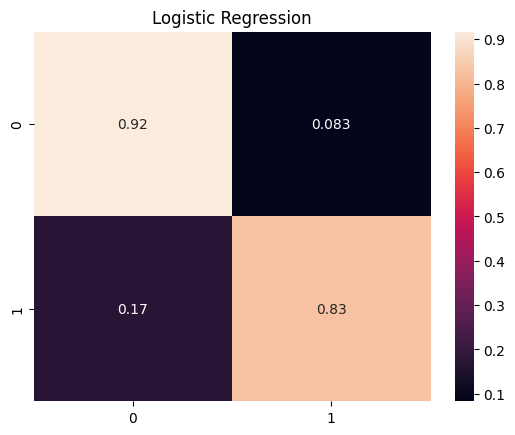

In [139]:
sns.heatmap(confusion_matrix(y_test,test_pred, normalize="true"), annot=True)
plt.title("Logistic Regression");

In [112]:
X_train_scaled.columns

Index(['Hora_dia', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud',
       'Latitud', 'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atropellament',
       'Sortida de via amb bolcada', 'Sortida de via amb xoc o col.lisió',
       'Xoc amb animal a la calçada', 'Xoc contra element estàtic', 'Matí',
       'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable', 'Dijous',
 

In [113]:
# sns.pairplot(df[['Numero_victimes', 'Numero_vehicles_implicats', 'Longitud', 'Latitud',"clas1"]],hue = "clas1")

Observando el pairplot en las categorías de "Número de víctimas" y "Número de vehículos implicados" se aprecia que, de acuerdo con la métrica, resulta sencillo clasificar el accidente en función del grado de siniestralidad. Guardamos el modelo.



In [114]:
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=8, random_state=42)

In [115]:
rnd_grid = {"n_estimators": [100,200,300],
            "max_depth" : [5,8,10],
            'class_weight': ["balanced",{0:1,1:5}],  # Peso de clase negativa / positiva
            }

In [116]:
rnd_cv = GridSearchCV(rnd_clf,rnd_grid, cv = 5, scoring="recall", n_jobs=-1, verbose=2)

In [117]:
grid_rnd = rnd_cv.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [118]:
grid_rnd.best_params_

{'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 200}

In [119]:
grid_rnd.best_score_

np.float64(0.8845531798245613)

In [120]:
best_clf1 = grid_rnd.best_estimator_

In [121]:
rnd_grid2 = {"n_estimators": [150,200,250],
            "max_depth" : [4,5,6],
            'class_weight': ["balanced",{0:1,1:50}],  # Peso de clase negativa / positiva
            }

In [122]:
grid_rnd2 = GridSearchCV(rnd_clf,rnd_grid2,cv = 5, scoring="recall",n_jobs=-1,verbose=2)

In [123]:
grid_rnd2.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=8, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', {0: 1, 1: 50}],
                         'max_depth': [4, 5, 6],
                         'n_estimators': [150, 200, 250]},
             scoring='recall', verbose=2)

In [124]:
grid_rnd2.best_params_

{'class_weight': {0: 1, 1: 50}, 'max_depth': 4, 'n_estimators': 250}

In [125]:
grid_rnd2.best_score_

np.float64(0.9352598075048733)

In [126]:
best_clf2 = grid_rnd2.best_estimator_

In [127]:
rnd_pred_train = best_clf1.predict(X_train)
print(classification_report(y_train,rnd_pred_train))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    103460
           1       0.13      0.90      0.22      2564

    accuracy                           0.85    106024
   macro avg       0.56      0.87      0.57    106024
weighted avg       0.98      0.85      0.90    106024



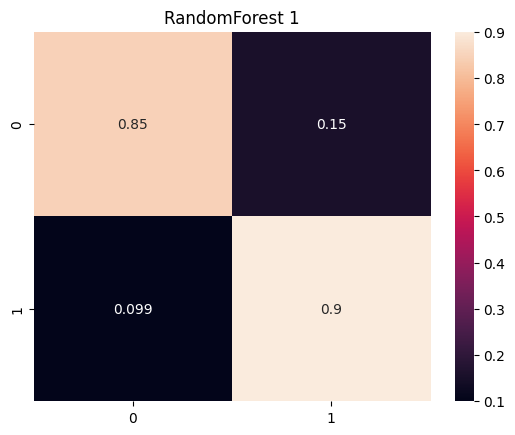

In [135]:
sns.heatmap(confusion_matrix(y_train,rnd_pred_train, normalize="true"),annot = True)
plt.title("RandomForest 1");

In [129]:
rnd_test_pred = best_clf1.predict(X_test)

In [130]:
print(classification_report(y_test,rnd_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.84      0.91     25866
           1       0.12      0.87      0.21       641

    accuracy                           0.85     26507
   macro avg       0.56      0.86      0.56     26507
weighted avg       0.97      0.85      0.90     26507



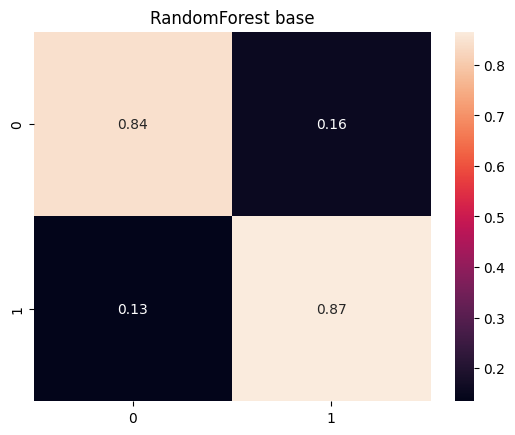

In [140]:
sns.heatmap(confusion_matrix(y_test,rnd_test_pred, normalize="true"),annot = True )
plt.title("RandomForest base");

In [132]:
best_pred2 = best_clf2.predict(X_test)

In [133]:
print(classification_report(y_test,best_pred2))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     25866
           1       0.09      0.92      0.16       641

    accuracy                           0.77     26507
   macro avg       0.54      0.84      0.52     26507
weighted avg       0.98      0.77      0.85     26507



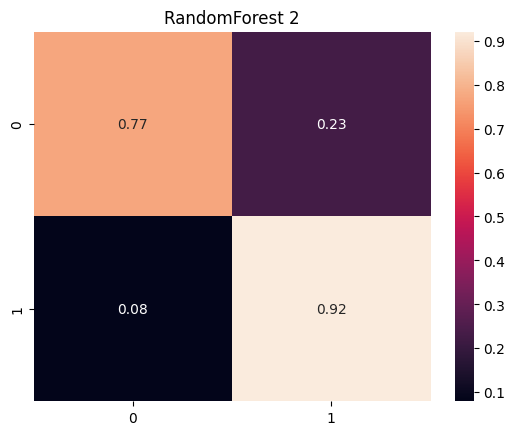

In [136]:
sns.heatmap(confusion_matrix(y_test,best_pred2,normalize="true"), annot = True)
plt.title("RandomForest 2");

In [ ]:
# from sklearn.svm import SVC

In [ ]:
# svc = Pipeline(steps = [("normalize",MinMaxScaler()),("classifier",SVC(C = 1,class_weight="balanced",random_state=42))])

In [ ]:
# svc.fit(X_train,y_train)

In [ ]:
# svc_train_pred = svc.predict(X_train)

In [ ]:
# print(classification_report(y_train,svc_train_pred))

In [ ]:
# svc_test_pred = svc.predict(X_test)

In [ ]:
# print(classification_report(y_test,svc_test_pred))

In [ ]:
# sns.heatmap(confusion_matrix(y_test, svc_test_pred, normalize = "true"), annot = True);

In [142]:
import pickle

In [143]:
filename = 'clasificacion1'

with open(filename, 'wb') as archivo_salida:
    pickle.dump(best_clf1, archivo_salida)

Por lo tanto, a partir de este algoritmo, se desarrollará los que vienen a continuación.

In [ ]:
df.columns

Index(['Numero_expedient', 'Codi_districte', 'Nom_districte', 'Codi_barri',
       'Nom_barri', 'Codi_carrer', 'Nom_carrer', 'Descripcio_dia_setmana',
       'Mes_any', 'Nom_mes', 'Dia_mes', 'Hora_dia', 'Descripcio_torn',
       'Numero_morts', 'Numero_lesionats_lleus', 'Numero_lesionats_greus',
       'Numero_victimes', 'Numero_vehicles_implicats', 'Coordenada_UTM_Y',
       'Coordenada_UTM_X', 'Longitud', 'Latitud', 'Descripcio_tipus_dia',
       'Any', 'datetime', 'Altres', 'Creuar per fora pas de vianants',
       'Desconegut', 'Desobeir altres senyals',
       'Desobeir el senyal del semàfor', 'No és causa del vianant',
       'Transitar a peu per la calçada', 'Abast', 'Abast multiple',
       'Altres_Vehicle', 'Atropellament', 'Bolcada (més de dues rodes)',
       'Caiguda (dues rodes)', 'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atrope

### 2. Ahora entrenaremos modelos para clasificar los eventos de categoría 1 en los tres niveles de siniestralidad

In [144]:
cat1 = df[df["clas1"] == 1]
cat1.reset_index(drop = True,inplace=True)
cat1

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres,Metrica,Grau_emergencia,clas1
0,2024S000003,2.0,Eixample,10,Sant Antoni,169409.0,Corts Catalanes,Dilluns,1.0,Gener,...,0,1,0,0,0,0,0,1.791759,3,1
1,2024S000004,1.0,Ciutat Vella,2,el Barri Gòtic,701498.0,B-10 (Besòs),Dilluns,1.0,Gener,...,0,1,0,0,0,0,0,2.674149,4,1
2,2024S000005,4.0,Les Corts,19,les Corts,231502.0,Numància,Dilluns,1.0,Gener,...,0,1,0,0,0,0,0,1.504077,2,1
3,2024S000044,7.0,Horta-Guinardó,35,el Guinardó,152905.0,Guinardó,Dijous,1.0,Gener,...,1,0,0,0,0,0,0,1.504077,2,1
4,2024S000083,4.0,Les Corts,21,Pedralbes,144601.0,Diagonal,Divendres,1.0,Gener,...,0,0,0,0,0,0,1,1.504077,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,2010S006800,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Dimecres,10.0,Octubre,...,0,0,0,1,0,0,0,1.504077,2,1
3201,2010S007951,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Divendres,11.0,Novembre,...,0,0,0,0,0,0,1,1.504077,2,1
3202,2010S007698,6.0,Gràcia,28,Vallcarca i els Penitents,701267.0,Dalt (Besòs),Dijous,11.0,Novembre,...,1,0,0,0,0,0,0,2.525729,4,1
3203,2010S002027,6.0,Gràcia,31,la Vila de Gràcia,201104.0,Martí,Dimecres,3.0,Març,...,0,0,0,1,0,0,0,2.442347,4,1


In [145]:
cat1.drop(columns = "clas1")

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Descripcio_dia_setmana,Mes_any,Nom_mes,...,No laborable,Dijous,Dilluns,Dimarts,Dimecres,Dissabte,Diumenge,Divendres,Metrica,Grau_emergencia
0,2024S000003,2.0,Eixample,10,Sant Antoni,169409.0,Corts Catalanes,Dilluns,1.0,Gener,...,1,0,1,0,0,0,0,0,1.791759,3
1,2024S000004,1.0,Ciutat Vella,2,el Barri Gòtic,701498.0,B-10 (Besòs),Dilluns,1.0,Gener,...,1,0,1,0,0,0,0,0,2.674149,4
2,2024S000005,4.0,Les Corts,19,les Corts,231502.0,Numància,Dilluns,1.0,Gener,...,1,0,1,0,0,0,0,0,1.504077,2
3,2024S000044,7.0,Horta-Guinardó,35,el Guinardó,152905.0,Guinardó,Dijous,1.0,Gener,...,0,1,0,0,0,0,0,0,1.504077,2
4,2024S000083,4.0,Les Corts,21,Pedralbes,144601.0,Diagonal,Divendres,1.0,Gener,...,0,0,0,0,0,0,0,1,1.504077,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3200,2010S006800,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Dimecres,10.0,Octubre,...,0,0,0,0,1,0,0,0,1.504077,2
3201,2010S007951,5.0,Sarrià-Sant Gervasi,23,Sarrià,320908.0,Sarrià a Vallvidrera,Divendres,11.0,Novembre,...,0,0,0,0,0,0,0,1,1.504077,2
3202,2010S007698,6.0,Gràcia,28,Vallcarca i els Penitents,701267.0,Dalt (Besòs),Dijous,11.0,Novembre,...,0,1,0,0,0,0,0,0,2.525729,4
3203,2010S002027,6.0,Gràcia,31,la Vila de Gràcia,201104.0,Martí,Dimecres,3.0,Març,...,0,0,0,0,1,0,0,0,2.442347,4


In [146]:
for i in df[df["Grau_emergencia"] >= 2]["Grau_emergencia"].sort_values().unique():
    print(i)
    cat1.loc[:,"Grau_emergencia"] = np.where(cat1.loc[:,"Grau_emergencia"] == i, i-2,cat1.loc[:,"Grau_emergencia"])

2
3
4


In [147]:
cat1["Grau_emergencia"].unique()

array([1, 2, 0])

In [148]:
df["Grau_emergencia"].value_counts()

Grau_emergencia
1    100307
0     29019
2      2351
3       481
4       373
Name: count, dtype: int64

In [149]:
cat1["Grau_emergencia"].value_counts()

Grau_emergencia
0    2351
1     481
2     373
Name: count, dtype: int64

In [ ]:
cat1["Grau_emergencia"].value_counts(normalize=True)

Grau_emergencia
0    0.733541
1    0.150078
2    0.116381
Name: proportion, dtype: float64

In [151]:
X2 = cat1.select_dtypes("number")
X2.drop(columns=["Numero_morts","Numero_lesionats_lleus","Numero_lesionats_greus"],inplace=True)
X2.drop(columns=["Codi_districte","Codi_carrer","Mes_any","Dia_mes","Coordenada_UTM_Y","Coordenada_UTM_X", "Any","No laborable","Grau_emergencia","clas1","Metrica"],inplace=True)

In [152]:
X2.columns

Index(['Hora_dia', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud',
       'Latitud', 'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atropellament',
       'Sortida de via amb bolcada', 'Sortida de via amb xoc o col.lisió',
       'Xoc amb animal a la calçada', 'Xoc contra element estàtic', 'Matí',
       'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable', 'Dijous',
 

In [153]:
y2 = cat1["Grau_emergencia"]

In [154]:
pp = pd.concat([X2,y2],axis = 1)

In [155]:
len(pp.columns)

52

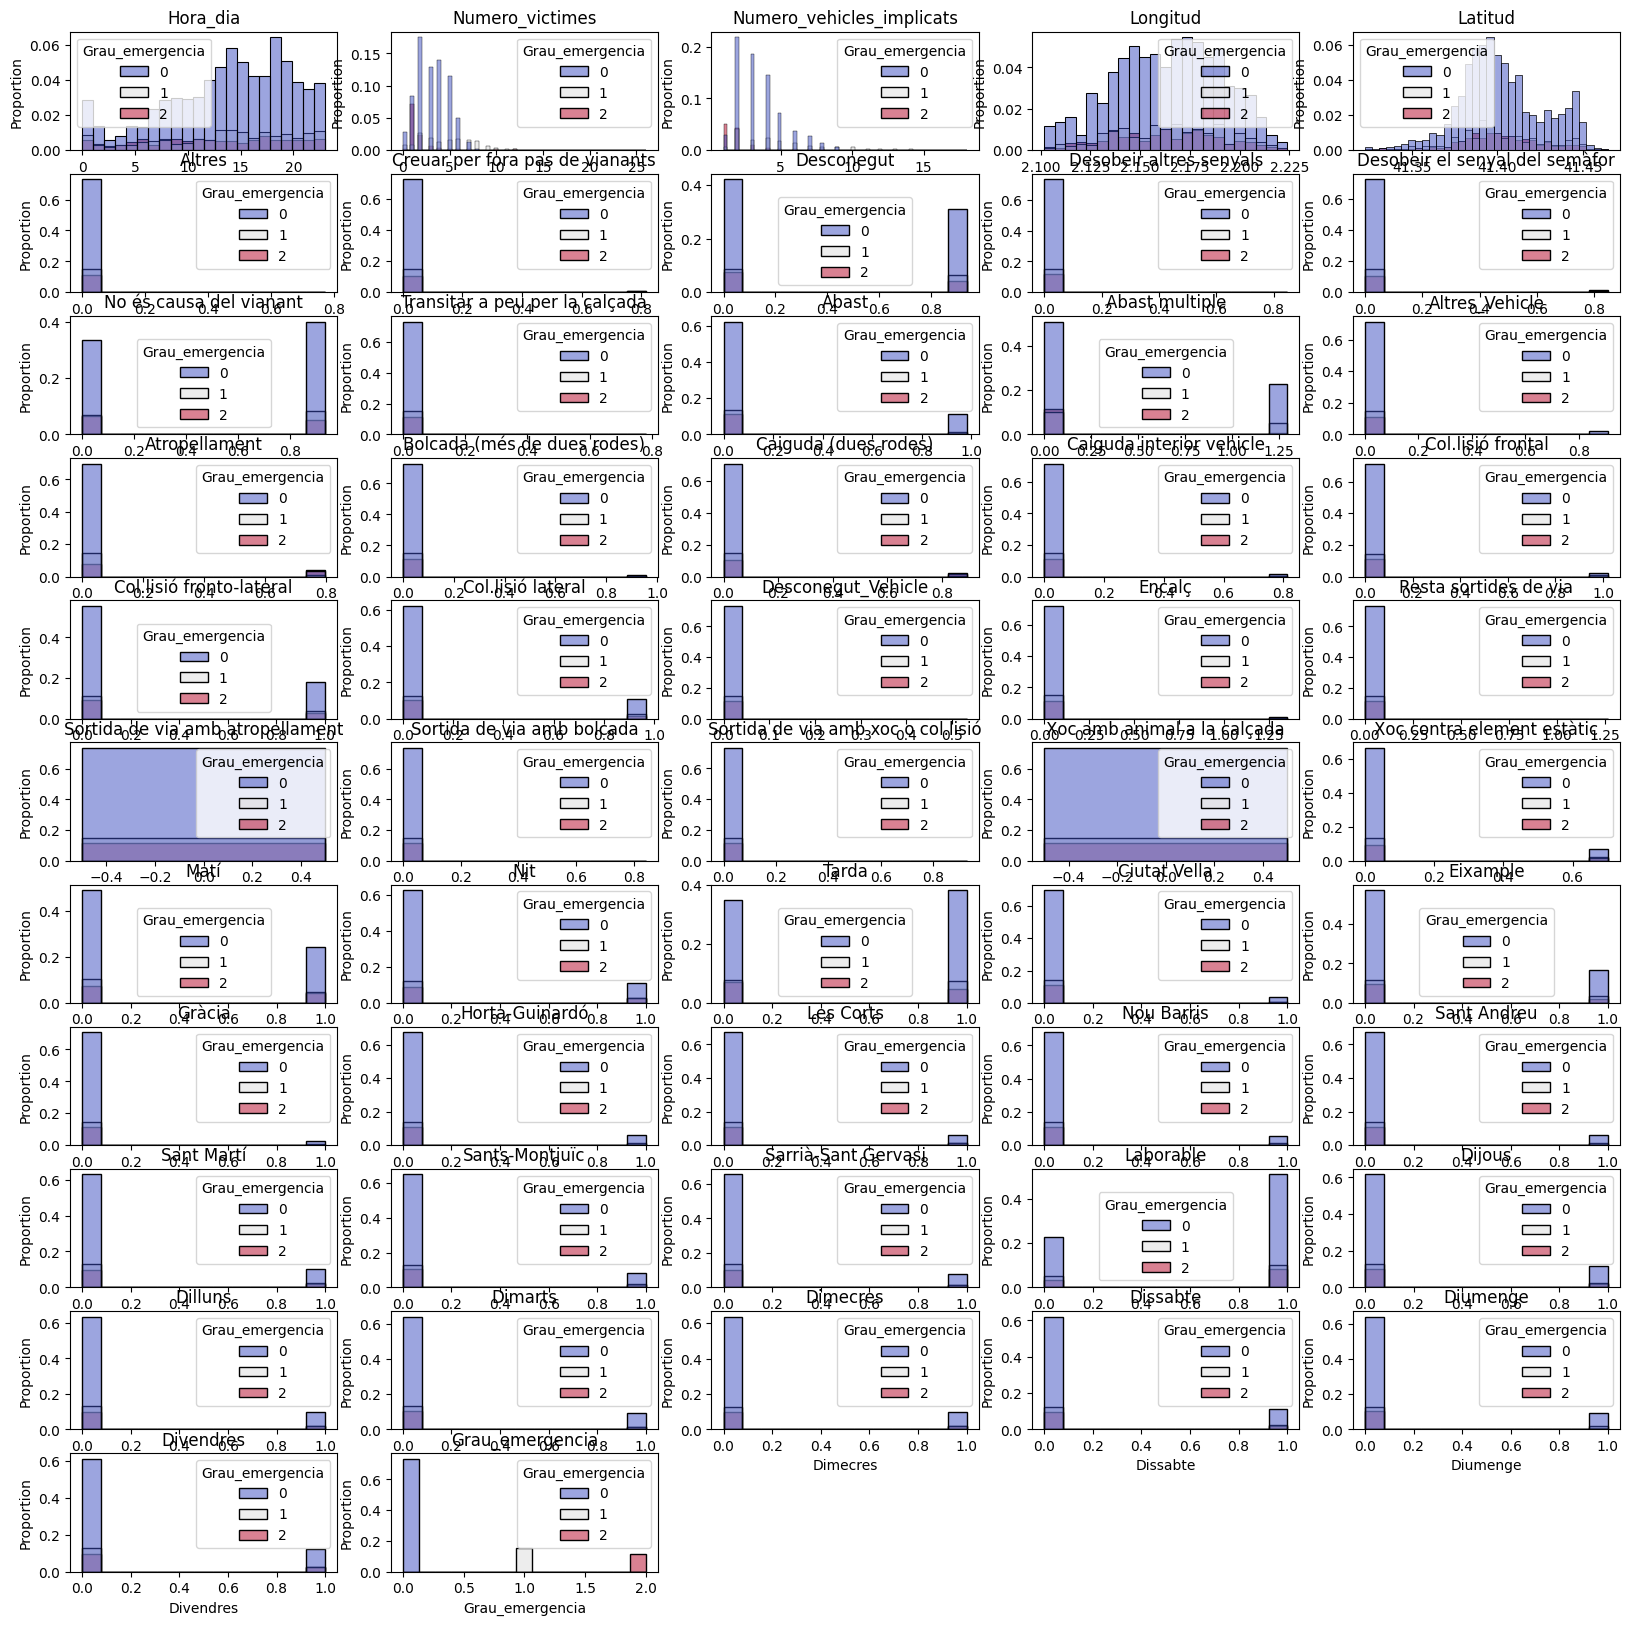

In [156]:
plt.figure(figsize=(20,20))
for i,col in enumerate(pp.columns):
    plt.subplot(11,5,i+1)
    sns.histplot(pp, x= col,stat = "proportion", hue = "Grau_emergencia",palette = "coolwarm")
    plt.title(col);


Visto el ruido presente en los siguientes histogramas, sería conveniente agrupar diferentes descripciones de accidente en diferentes subgrupos.

In [ ]:
# sns.pairplot(pp,hue = "Grau_emergencia",palette = "Spectral_r");

In [157]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2, random_state = 42, stratify = y2)

In [158]:
xgb = xgboost.XGBClassifier(random_state = 42)

In [159]:
rnd_pipe = Pipeline(steps=[("selection",SelectKBest())
                                ,("classifier",RandomForestClassifier(random_state=42))
])

grad_pipe = Pipeline(steps=[("selection",SelectKBest())
                                ,("classifier",GradientBoostingClassifier(random_state=42))])

xgb_pipe = Pipeline(steps=[("selection",SelectKBest())
                                ,("classifier",xgb)])

In [160]:
1/y2.value_counts(normalize=True)

Grau_emergencia
0    1.363250
1    6.663202
2    8.592493
Name: proportion, dtype: float64

In [161]:
# from sklearn.utils import class_weight
# classes_weights = list(class_weight.compute_class_weight('balanced',
#                                              np.unique(y2),
#                                              y2))


In [162]:
# ada_param = {"selection__score_func":[f_classif,chi2],
#              "selection__k": range(5,15),
#              "classifier__learning_rate":[1,0.1,0.001],
#              "classifier__estimator__class_weight":["balanced"],
#              "classifier__estimator__max_depth":[5,8,10]}

rnd_param = {"selection__score_func":[f_classif,chi2],
             "selection__k": range(5,15),
             "classifier__class_weight": ["balanced", {0:1,1:7,2:10}],
             "classifier__max_depth":[5,8,10]}



#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.8, 1],
#     'colsample_bytree': [0.8, 1],
#     'gamma': [0, 1],
#     'reg_alpha': [0, 0.1, 1],
#     'reg_lambda': [1, 1.5, 2]
# }

grad_param = {"selection__score_func":[f_classif,chi2],
              "selection__k": np.arange(5,15),
              "classifier__n_estimators":[100,200,300],
            #   "classifier__loss": ["log_loss", "exponential"],
            #   "classifier__max_features": ["log2","sqrt",None]
              }

xgb_param = {"selection__score_func":[f_classif,chi2],
             "selection__k":np.arange(5,15),
             'classifier__n_estimators': [100, 200],
             'classifier__max_depth': [5, 8,10],
             "classifier__class_weight":[[1,1,1],[1.363250,6.663202,8.592493]],
             'classifier__gamma': [0, 1]
             }

In [248]:
def dataframe_importances(model,A):
    best = model.best_estimator_
    selector = best.named_steps["selection"]
    mask = selector.get_support()
    selected_features = [name for name, selected in zip(A.columns, mask) if selected]
    importances = best.named_steps["classifier"].feature_importances_
    return pd.DataFrame({"Feature":selected_features,"Importancia":importances}).sort_values(by="Importancia",ascending=False)
    

In [164]:
rnd_grid_gr = GridSearchCV(rnd_pipe,rnd_param,cv = 5, scoring=make_scorer(recall_score, response_method='predict_proba',average = None,labels = [0,1,2], pos_label=2), n_jobs=-1, verbose = 2)
grad_grid_gr = GridSearchCV(grad_pipe,grad_param,cv = 5, scoring=make_scorer(recall_score, response_method='predict_proba',average = None,labels = [0,1,2], pos_label=2), n_jobs=-1, verbose = 2)
xgb_grid_gr = GridSearchCV(xgb_pipe,xgb_param,cv = 5, scoring=make_scorer(recall_score, response_method='predict_proba',average = None,labels = [0,1,2] ,pos_label=2), n_jobs=-1, verbose = 2)

In [165]:
rnd_grid_gr.fit(X2_train,y2_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced',
                                                      {0: 1, 1: 7, 2: 10}],
                         'classifier__max_depth': [5, 8, 10],
                         'selection__k': range(5, 15),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [166]:
rnd_grid_gr.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'selection__k': 5,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [167]:
best_rnd = rnd_grid_gr.best_estimator_

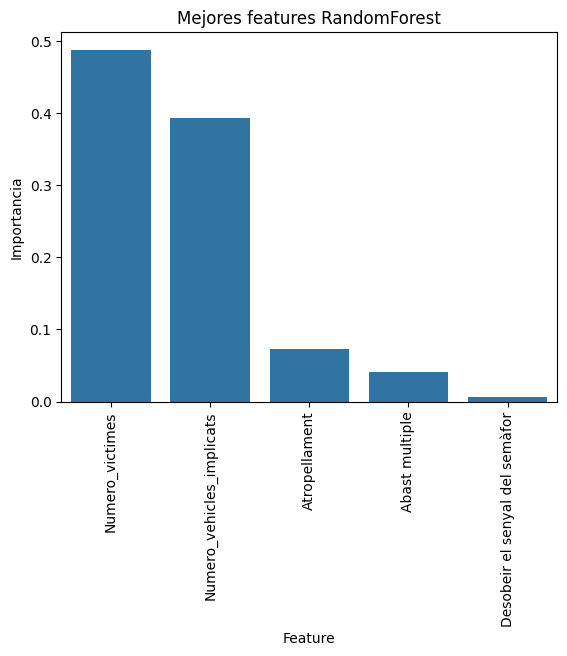

In [168]:
sns.barplot(dataframe_importances(rnd_grid_gr,X2), x = "Feature", y = "Importancia")
plt.xticks(rotation = "vertical")
plt.title("Mejores features RandomForest");

In [169]:
rnd_pred = best_rnd.predict(X2_test)

In [170]:
print(classification_report(y2_test,rnd_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91       470
           1       0.66      0.70      0.68        96
           2       0.76      0.67      0.71        75

    accuracy                           0.85       641
   macro avg       0.78      0.76      0.77       641
weighted avg       0.85      0.85      0.85       641



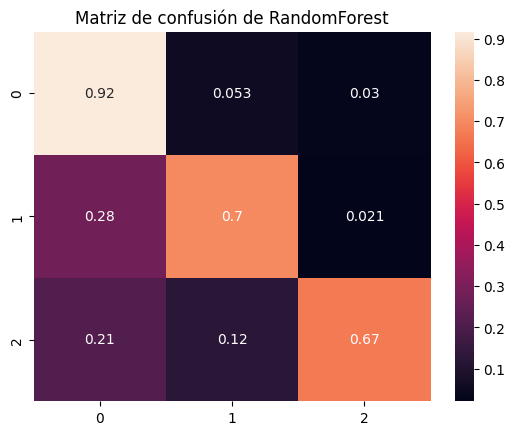

In [171]:
sns.heatmap(confusion_matrix(y2_test,rnd_pred, normalize="true"), annot = True)
plt.title("Matriz de confusión de RandomForest");

In [172]:
grad_grid_gr.fit(X2_train,y2_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        GradientBoostingClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__n_estimators': [100, 200, 300],
                         'selection__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [173]:
grad_grid_gr.best_params_

{'classifier__n_estimators': 100,
 'selection__k': np.int64(5),
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [174]:
best_grad = grad_grid_gr.best_estimator_

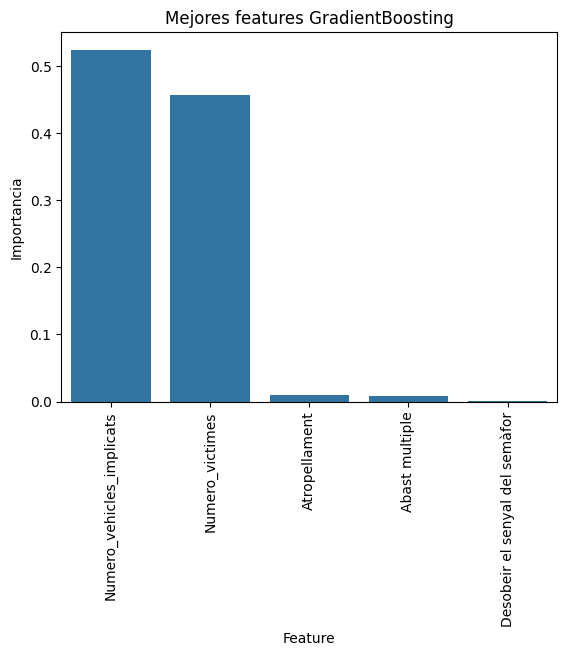

In [175]:
sns.barplot(dataframe_importances(grad_grid_gr,X2), x = "Feature", y = "Importancia")
plt.xticks(rotation = "vertical")
plt.title("Mejores features GradientBoosting");

In [176]:
grad_pred = best_grad.predict(X2_test)

In [177]:
print(classification_report(y2_test,grad_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       470
           1       0.97      0.69      0.80        96
           2       0.96      0.61      0.75        75

    accuracy                           0.90       641
   macro avg       0.94      0.77      0.83       641
weighted avg       0.91      0.90      0.90       641



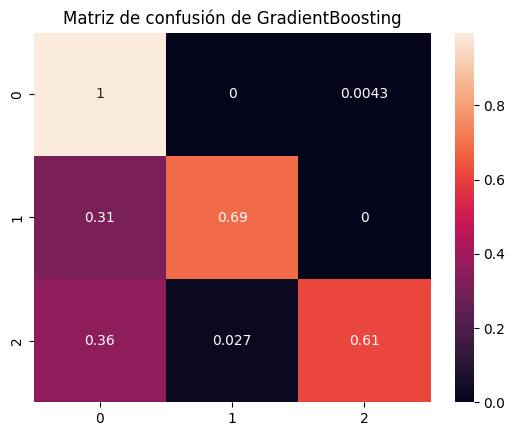

In [178]:
sns.heatmap(confusion_matrix(y2_test,grad_pred, normalize="true"),annot = True)
plt.title("Matriz de confusión de GradientBoosting");

In [179]:
xgb_grid_gr.fit(X2_train,y2_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_po...
                         'classifier__gamma': [0, 1],
                         'classifier__max_depth': [5, 8, 10],
                         'classifier__n_estimators': [100, 200],
                         'selection__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [180]:
xgb_grid_gr.best_params_

{'classifier__class_weight': [1, 1, 1],
 'classifier__gamma': 0,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'selection__k': np.int64(5),
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [181]:
best_xgb = xgb_grid_gr.best_estimator_

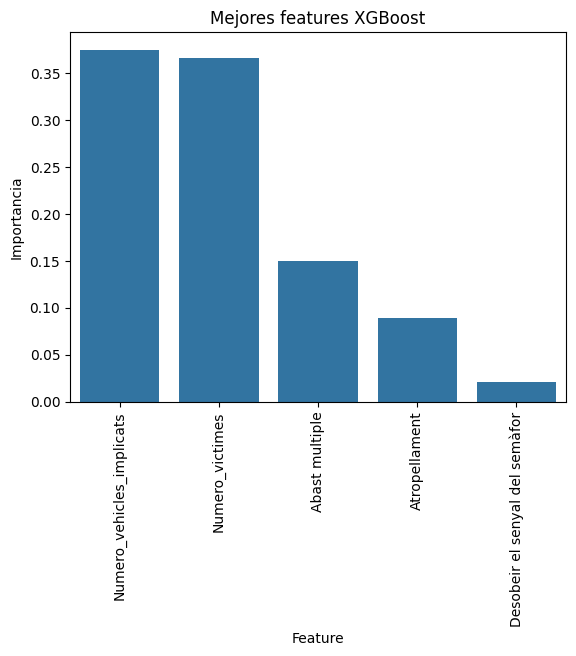

In [182]:
sns.barplot(dataframe_importances(xgb_grid_gr,X2), x = "Feature", y = "Importancia")
plt.xticks(rotation = "vertical")
plt.title("Mejores features XGBoost");

In [183]:
xgb_pred = best_xgb.predict(X2_test)

In [184]:
print(classification_report(y2_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       470
           1       0.90      0.69      0.78        96
           2       0.94      0.60      0.73        75

    accuracy                           0.90       641
   macro avg       0.91      0.76      0.82       641
weighted avg       0.90      0.90      0.89       641



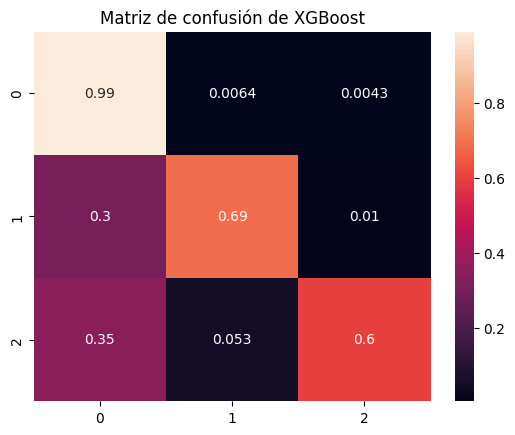

In [185]:
sns.heatmap(confusion_matrix(y2_test,xgb_pred, normalize="true"), annot = True)
plt.title("Matriz de confusión de XGBoost");

In [186]:
X2.iloc[:,[24,27]].value_counts()

Resta sortides de via  Sortida de via amb xoc o col.lisió
0.000000               0.000000                              3189
                       0.926987                                12
1.263412               0.000000                                 4
Name: count, dtype: int64

In [187]:
X2_train.drop(columns=["Sortida de via amb atropellament","Xoc amb animal a la calçada"],inplace=True)

In [188]:
X2_test.drop(columns=["Sortida de via amb atropellament","Xoc amb animal a la calçada"],inplace=True)

In [190]:
dataframe_importances(rnd_grid_gr,X2)

,Feature,Importancia
0,Numero_victimes,0.488055
1,Numero_vehicles_implicats,0.392569
4,Atropellament,0.072835
3,Abast multiple,0.040531
2,Desobeir el senyal del semàfor,0.006010


In [ ]:
# dataframe_importances(xgb_grid_gr)

In [ ]:
# print(xgb_grid_gr.best_params_)

In [ ]:
# best_xgb = xgb_grid_gr.best_estimator_
# xgb_pred = best_xgb.predict(X2_test)


In [ ]:
# print(classification_report(y2_test,xgb_pred))

In [ ]:
# sns.heatmap(confusion_matrix(y2_test,xgb_pred, normalize="true"),annot = True)

NameError: name 'xgb_pred' is not defined

In [191]:
prueba = rnd_grid_gr.fit(X2_train[["Numero_victimes","Numero_vehicles_implicats"]],y2_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


In [192]:
prueba.best_score_

np.float64(nan)

In [193]:
prueba.best_estimator_

Pipeline(steps=[('selection', SelectKBest(k=5)),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=5,
                                        random_state=42))])

In [194]:
prueba.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'selection__k': 5,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [195]:
prueba_pred = prueba.predict(X2_test[["Numero_victimes","Numero_vehicles_implicats"]])

In [196]:
print(classification_report(y2_test,prueba_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       470
           1       0.81      0.70      0.75        96
           2       0.85      0.67      0.75        75

    accuracy                           0.88       641
   macro avg       0.85      0.77      0.81       641
weighted avg       0.88      0.88      0.88       641



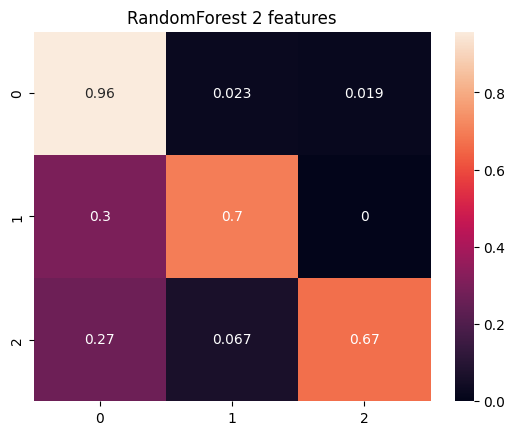

In [198]:
sns.heatmap(confusion_matrix(y2_test,prueba_pred, normalize="true"),annot = True)
plt.title("RandomForest 2 features");

In [200]:
prueba2 = rnd_grid_gr.fit(X2_train[["Numero_victimes","Numero_vehicles_implicats","Atropellament"]],y2_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


In [201]:
prueba2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'selection__k': 5,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [202]:
prueba_pred2 = prueba2.best_estimator_

In [204]:
pred_prueba2 = prueba_pred2.predict(X2_test[["Numero_victimes","Numero_vehicles_implicats","Atropellament"]])

In [205]:
print(classification_report(y2_test,pred_prueba2))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       470
           1       0.67      0.70      0.68        96
           2       0.78      0.65      0.71        75

    accuracy                           0.86       641
   macro avg       0.79      0.76      0.77       641
weighted avg       0.86      0.86      0.86       641



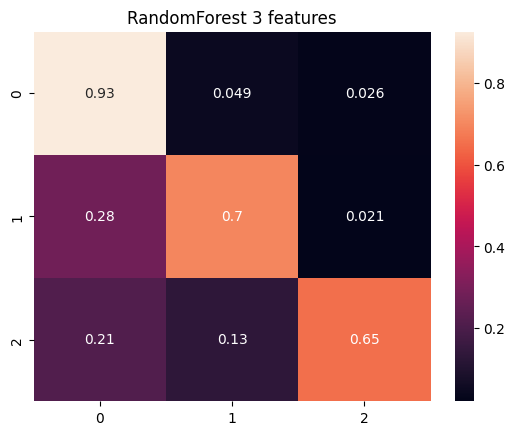

In [206]:
sns.heatmap(confusion_matrix(y2_test,pred_prueba2,normalize="true"),annot = True)
plt.title("RandomForest 3 features");

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# knn_per_k = []
# for k in range(10,101):
    
#     model = Pipeline(steps = [("scaler",MinMaxScaler()),("classifier",KNeighborsClassifier(n_neighbors=k, weights="distance"))])
#     model.fit(X2_train,y2_train)
#     knn_per_k.append(k)

In [208]:
lm_pipe = Pipeline([("scaler",StandardScaler()),("classifier",LogisticRegression(multi_class="auto",solver="newton-cg",max_iter=10000,class_weight="balanced",random_state=42))])


In [209]:
lm_pipe.fit(X2_train,y2_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    multi_class='auto', random_state=42,
                                    solver='newton-cg'))])

In [210]:
lm_pred = lm_pipe.predict(X2_test)

In [211]:
print(classification_report(y2_test,lm_pred))

              precision    recall  f1-score   support

           0       0.90      0.60      0.72       470
           1       0.35      0.66      0.46        96
           2       0.32      0.64      0.43        75

    accuracy                           0.61       641
   macro avg       0.52      0.63      0.53       641
weighted avg       0.75      0.61      0.65       641



In [214]:
coefs = lm_pipe.named_steps["classifier"].coef_
coefs

array([[ 0.02308243, -0.27230693, -0.10394536,  0.04339106,  0.007364  ,
        -0.01568594,  0.02719729, -0.0218516 ,  0.06963008, -0.03595505,
         0.02518115, -0.01158691,  0.21224286,  0.3751625 , -0.00473853,
        -0.26724903,  0.29177494, -0.09848433,  0.01426018, -0.07168158,
        -0.10875921, -0.06848548,  0.07197097, -0.09175843,  0.03578518,
         0.        , -0.0937624 , -0.12313412,  0.02257222, -0.08262541,
         0.03941342, -0.00742981,  0.05892508,  0.05237147, -0.02875301,
         0.03956623, -0.0337182 , -0.05605995, -0.00710985, -0.03009569,
         0.00447693,  0.02202539,  0.02475946, -0.08646762,  0.06507897,
        -0.0444851 ,  0.0038576 ,  0.07233961, -0.02972967],
       [ 0.06545394,  0.58861949,  0.60701191,  0.09970213, -0.15740849,
         0.02836041, -0.08636748,  0.05997072, -0.03425843, -0.00717733,
        -0.03237475, -0.02640249, -0.02005456,  0.1632684 , -0.04500506,
         0.02860263, -0.55749747, -0.08679556, -0.00315682,  0.

In [1]:
pd.DataFrame({"Feature":X2.columns,"Coef":coefs}).sort_values(by = "Coef", inplace = True)

NameError: name 'pd' is not defined

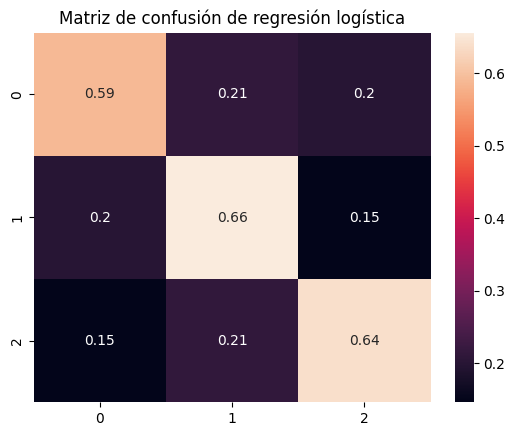

In [1171]:
sns.heatmap(confusion_matrix(y2_test, lm_pred, normalize="true"), annot = True)
plt.title("Matriz de confusión de regresión logística");


### 2.1.1. Ya que las dos variables más predictivas concentran un porcentaje muy elevado de representación, se van a crear nuecas variables como combinaciones de estas para itnentar encontrar algún nuevo patrón

In [215]:
X3 = X2.copy()
y3 = y2
X3["Victimes/vehicle"] = X3["Numero_victimes"]/X3["Numero_vehicles_implicats"]
X3["Logvictimes/vehicle"] = np.log1p(X3["Numero_victimes"])/X3["Numero_vehicles_implicats"]
X3["Logvictimes"] = np.log1p(X3["Numero_victimes"])
X3["Victimesxvehicle"] = X3["Numero_victimes"]*X3["Numero_vehicles_implicats"]
X3.drop(columns=['Sortida de via amb atropellament',"Xoc amb animal a la calçada","Numero_victimes"],inplace=True)

In [217]:
X2.columns

Index(['Hora_dia', 'Numero_victimes', 'Numero_vehicles_implicats', 'Longitud',
       'Latitud', 'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb atropellament',
       'Sortida de via amb bolcada', 'Sortida de via amb xoc o col.lisió',
       'Xoc amb animal a la calçada', 'Xoc contra element estàtic', 'Matí',
       'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia', 'Horta-Guinardó',
       'Les Corts', 'Nou Barris', 'Sant Andreu', 'Sant Martí',
       'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable', 'Dijous',
 

In [219]:
X3.columns

Index(['Hora_dia', 'Numero_vehicles_implicats', 'Longitud', 'Latitud',
       'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb bolcada',
       'Sortida de via amb xoc o col.lisió', 'Xoc contra element estàtic',
       'Matí', 'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia',
       'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu',
       'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable',
       'Dijous', 'Dilluns', 'Dimarts', 'Dimecres', 'Dissabte', 'Diumenge',
       'Divendres', 'Victimes

In [220]:
rnd_grid_gr2 = GridSearchCV(rnd_pipe,rnd_param,cv = 5, scoring=make_scorer(recall_score, response_method='predict_proba',average = None,labels = [0,1,2], pos_label=2), n_jobs=-1, verbose = 2)
xgb_grid_gr2 = GridSearchCV(xgb_pipe,xgb_param,cv = 5, scoring=make_scorer(recall_score, response_method='predict_proba',average = None,labels = [0,1,2] ,pos_label=2), n_jobs=-1, verbose = 2)

In [221]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,random_state=42, test_size=0.2)

In [222]:
rnd_grid_gr2.fit(X3_train,y3_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced',
                                                      {0: 1, 1: 7, 2: 10}],
                         'classifier__max_depth': [5, 8, 10],
                         'selection__k': range(5, 15),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [223]:
rnd_grid_gr2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'selection__k': 5,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [224]:
rnd_grid_gr2.best_score_

np.float64(nan)

In [225]:
best_rnd_gr2 = rnd_grid_gr2.best_estimator_

In [226]:
best_feat = dataframe_importances(rnd_grid_gr2,X3)
best_feat

,Feature,Importancia
4,Victimesxvehicle,0.491787
3,Logvictimes,0.234685
0,Numero_vehicles_implicats,0.212417
2,Atropellament,0.030996
1,Abast multiple,0.030115


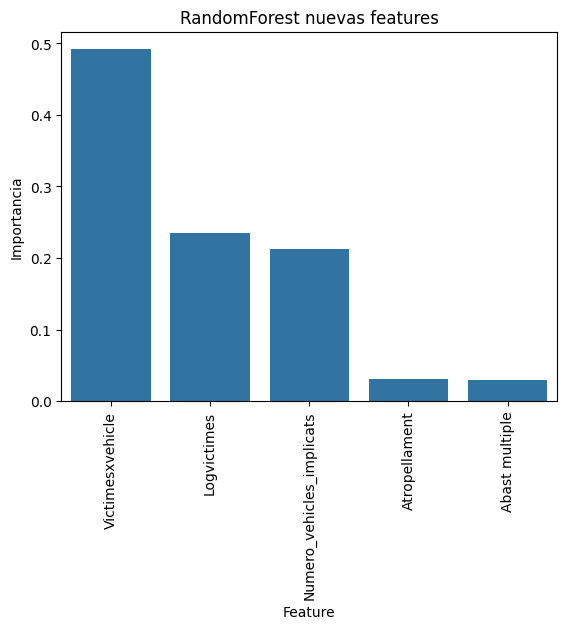

In [266]:
sns.barplot(best_feat, x = "Feature", y = "Importancia")
plt.title("RandomForest nuevas features")
plt.xticks(rotation = "vertical");

In [227]:
pred_rnd_gr2 = best_rnd_gr2.predict(X3_test)

In [228]:
print(classification_report(y3_test,pred_rnd_gr2))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       460
           1       0.85      0.68      0.76       104
           2       0.76      0.66      0.71        77

    accuracy                           0.87       641
   macro avg       0.83      0.77      0.80       641
weighted avg       0.87      0.87      0.87       641



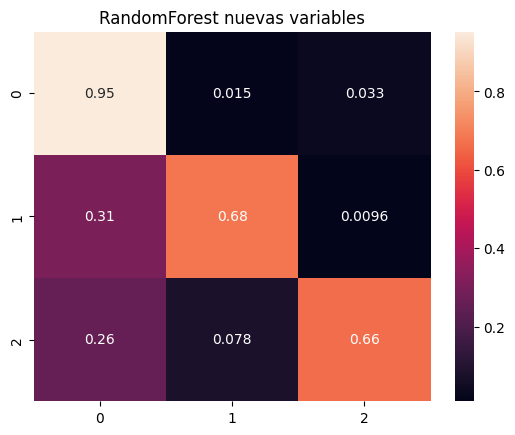

In [263]:
sns.heatmap(confusion_matrix(y3_test,pred_rnd_gr2, normalize="true"),annot = True)
plt.title("RandomForest nuevas variables");

In [232]:
xgb_grid_gr2.fit(X3_train,y3_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_po...
                         'classifier__gamma': [0, 1],
                         'classifier__max_depth': [5, 8, 10],
                         'classifier__n_estimators': [100, 200],
                         'selection__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [233]:
xgb_grid_gr2.best_params_

{'classifier__class_weight': [1, 1, 1],
 'classifier__gamma': 0,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'selection__k': np.int64(5),
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [235]:
best_xgb2 = xgb_grid_gr2.best_estimator_

In [236]:
xgb_pred2 = best_xgb2.predict(X3_test)

In [237]:
print(classification_report(y3_test,xgb_pred2))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       460
           1       0.92      0.65      0.76       104
           2       0.78      0.66      0.72        77

    accuracy                           0.88       641
   macro avg       0.86      0.76      0.80       641
weighted avg       0.88      0.88      0.87       641



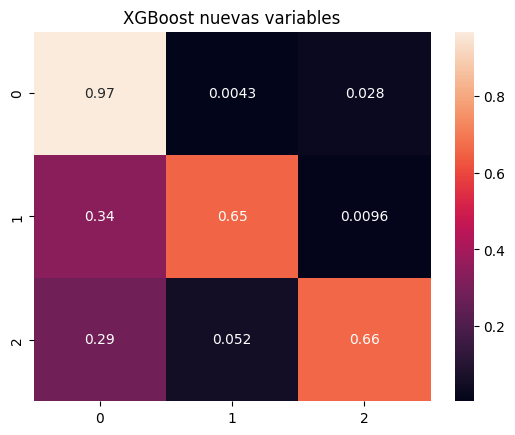

In [264]:
sns.heatmap(confusion_matrix(y3_test,xgb_pred2, normalize="true"),annot= True)
plt.title("XGBoost nuevas variables");

,Feature,Importancia
0,Hora_dia,0.615581
1,Numero_vehicles_implicats,0.197168
2,Longitud,0.187251


#### Probamos con las 3 mejores features con los nuevos modelos

In [241]:
rnd_grid_gr2.fit(X3_train[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]],y3_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan]


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__class_weight': ['balanced',
                                                      {0: 1, 1: 7, 2: 10}],
                         'classifier__max_depth': [5, 8, 10],
                         'selection__k': range(5, 15),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [242]:
rnd_grid_gr2.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__max_depth': 5,
 'selection__k': 5,
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [243]:
best_rnd_gr3 = rnd_grid_gr2.best_estimator_

In [244]:
pred_rnd_gr3 = best_rnd_gr3.predict(X3_test[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]])

In [245]:
print(classification_report(y3_test,pred_rnd_gr3))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       460
           1       0.86      0.69      0.77       104
           2       0.78      0.65      0.71        77

    accuracy                           0.88       641
   macro avg       0.84      0.77      0.80       641
weighted avg       0.87      0.88      0.87       641



Text(0.5, 1.0, 'RandomForest nuevas variables 3 features')

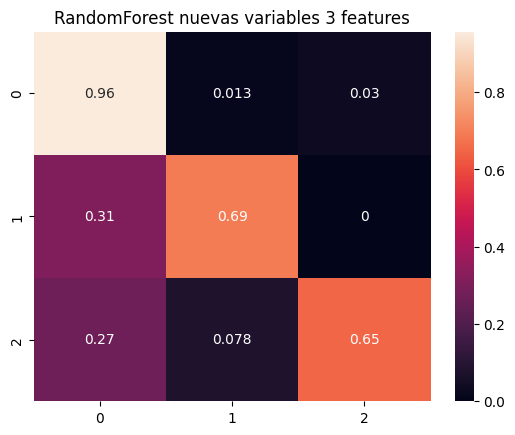

In [261]:
sns.heatmap(confusion_matrix(y3_test,pred_rnd_gr3, normalize="true"),annot = True)
plt.title("RandomForest nuevas variables 3 features")

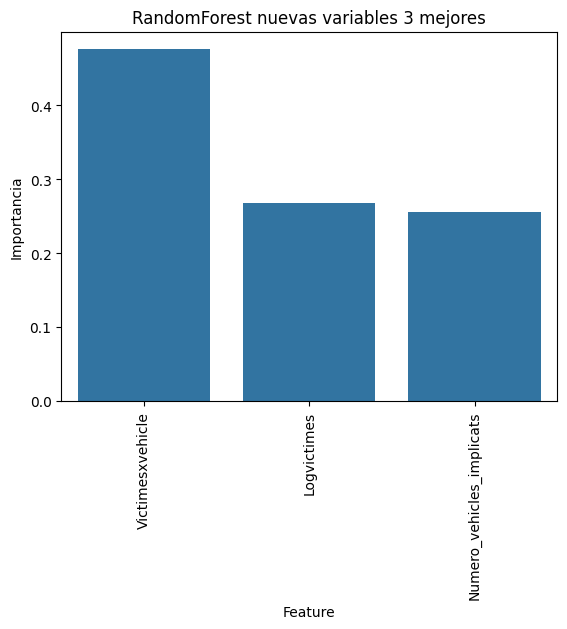

In [275]:
sns.barplot(dataframe_importances(rnd_grid_gr2,X3_test[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]]),x = "Feature", y = "Importancia")
plt.title("RandomForest nuevas variables 3 mejores")
plt.xticks(rotation = "vertical");

In [251]:
xgb_grid_gr2.fit(X3_train[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]],y3_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('selection', SelectKBest()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      feature_weights=None,
                                                      gamma=None,
                                                      grow_po...
                         'classifier__gamma': [0, 1],
                         'classifier__max_depth': [5, 8, 10],
                         'classifier__n_estimators': [100, 200],
                         'selection__k': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'selection__score_func': [<function f_classif at 0x000002299DAB82C0>,
                                                   <function chi2 at 0x000002299DAB8540>]},
             scoring=make_scorer(recall_score, response_method='predict_proba', average=None, labels=[0, 1, 2], pos_label=2),
             verbose=2)

In [254]:
xgb_grid_gr2.best_params_

{'classifier__class_weight': [1, 1, 1],
 'classifier__gamma': 0,
 'classifier__max_depth': 5,
 'classifier__n_estimators': 100,
 'selection__k': np.int64(5),
 'selection__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>}

In [255]:
best_xgb3 = xgb_grid_gr2.best_estimator_

In [256]:
xgb_pred3 = best_xgb3.predict(X3_test[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]])

In [257]:
print(classification_report(y3_test,xgb_pred3))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       460
           1       0.96      0.65      0.78       104
           2       0.98      0.56      0.71        77

    accuracy                           0.89       641
   macro avg       0.94      0.74      0.81       641
weighted avg       0.90      0.89      0.88       641



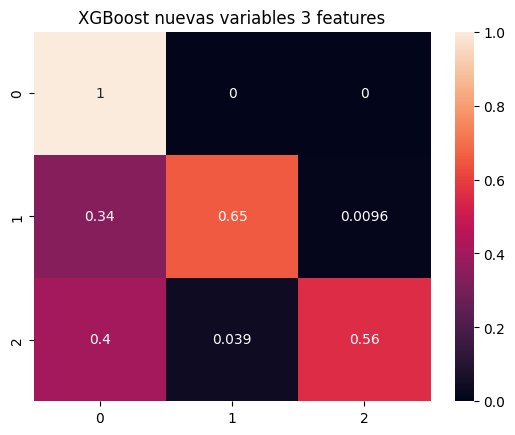

In [262]:
sns.heatmap(confusion_matrix(y3_test,xgb_pred3,normalize="true"),annot = True)
plt.title("XGBoost nuevas variables 3 features");

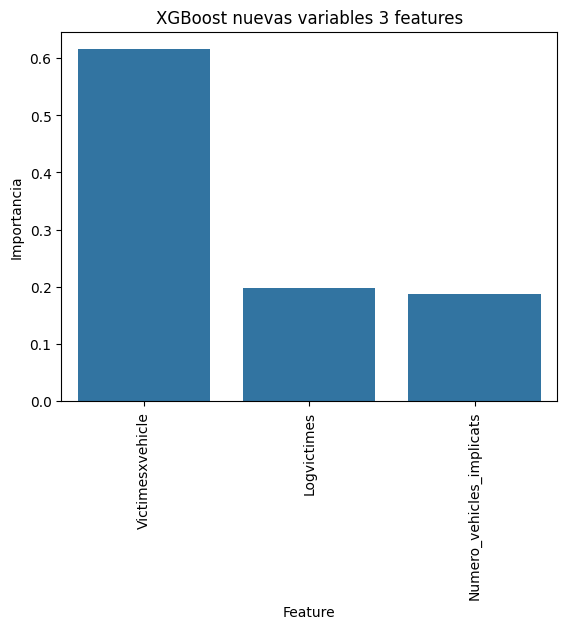

In [274]:
sns.barplot(dataframe_importances(xgb_grid_gr2,X3_test[["Victimesxvehicle","Logvictimes","Numero_vehicles_implicats"]]),x = "Feature", y = "Importancia")
plt.title("XGBoost nuevas variables 3 features")
plt.xticks(rotation = "vertical");

#### 2.1.2. Red neuronal de clasificación

In [278]:
from imblearn.combine import SMOTETomek

In [280]:
smote = SMOTETomek(ratio = 0.5,random_state=42)

TypeError: SMOTETomek.__init__() got an unexpected keyword argument 'ratio'

In [1082]:
len(X3.columns)

51

In [ ]:
X4 = X3.loc[:,best_feat["Feature"].unique]

In [ ]:
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y2,test_size=0.2,stratify=y2,random_state=42)

(2564, 5)

Grau_emergencia
0    2351
1     481
2     373
Name: count, dtype: int64

In [440]:
capas = [
    keras.Input((5,)),
    keras.layers.Dense(units = 10, activation='relu'),
    # keras.layers.Dense(units = 5,activation="sigmoid"),
    # keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 3, activation='softmax')
]

model = keras.models.Sequential(capas)

In [441]:
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [442]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [443]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")


history = model.fit(
    X4_train,
    y4_train,
    batch_size = 128,
    epochs = 100,
    validation_split = 0.1,
    callbacks = [early_stopping_cb, checkpoint_cb]
)


Epoch 1/100


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3536 - loss: 1.3590 - val_accuracy: 0.6265 - val_loss: 1.0093
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6505 - loss: 0.9514 - val_accuracy: 0.6887 - val_loss: 0.9356
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7082 - loss: 0.8569 - val_accuracy: 0.7082 - val_loss: 0.8545
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7317 - loss: 0.7808 - val_accuracy: 0.7082 - val_loss: 0.8963
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7422 - loss: 0.7855 - val_accuracy: 0.7082 - val_loss: 0.8212
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7433 - loss: 0.7522 - val_accuracy: 0.7082 - val_loss: 0.7989
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7429 - loss: 0.7345 - val_accuracy: 0.7082 - val_loss: 0.8416
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7386 - loss: 0.7547 - val_accuracy: 0.7510 - val_loss: 0.

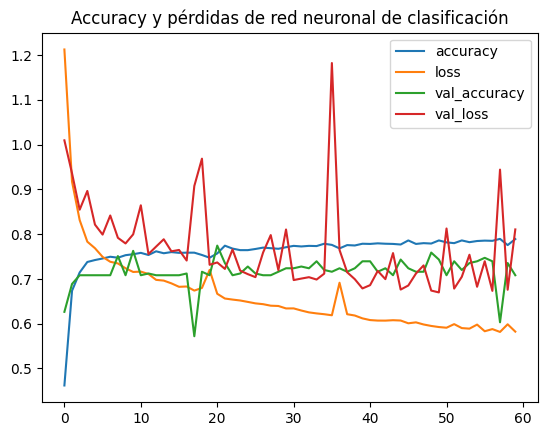

In [444]:
history_df = pd.DataFrame(history.history).plot()
plt.title("Accuracy y pérdidas de red neuronal de clasificación");

In [445]:
pred3 = model.predict(X4_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [446]:
pred3 = np.argmax(pred3, axis=1)
# pred3.value_counts()

In [447]:
print(classification_report(y3_test,pred3))

              precision    recall  f1-score   support

           0       0.72      0.99      0.83       460
           1       0.20      0.01      0.02       104
           2       0.00      0.00      0.00        77

    accuracy                           0.71       641
   macro avg       0.31      0.33      0.28       641
weighted avg       0.55      0.71      0.60       641



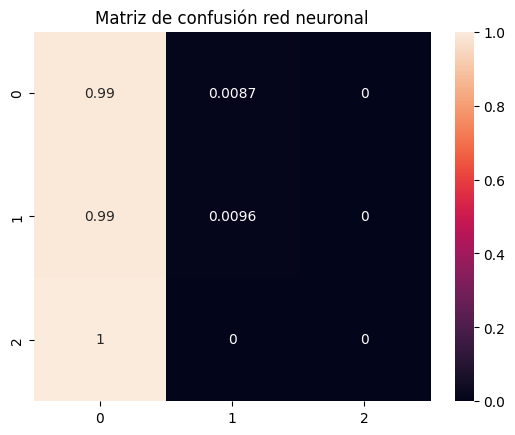

In [448]:
sns.heatmap(confusion_matrix(y3_test,pred3, normalize="true"), annot = True)
plt.title("Matriz de confusión red neuronal");

### 2.2 Intentamos reconducir la clasificación entrenando un modelo de regresión para predecir la métrica

In [298]:
y2_met = cat1["Metrica"]

In [301]:
X2.shape

(3205, 51)

In [305]:
X3.shape

(3205, 52)

In [330]:
X3_met_train, X3_met_test, y3_met_train, y3_met_test = train_test_split(X3,y2_met,random_state= 42, test_size = 0.2)

In [331]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [332]:
rnd_reg_pipe = Pipeline(steps=[("selector",SelectKBest(k = 5)),("regressor",RandomForestRegressor(random_state=42,max_depth=5, criterion="absolute_error"))]) 

In [333]:
# rnd_reg_param = {"selector__k":np.arange(5,15),
#                  "regressor__n_estimators": [100,200,300],
#                  "regressor__max_depth": [5,8,10],
# }

In [334]:
# rnd_reg_grid = GridSearchCV(rnd_reg_pipe,rnd_reg_param,cv = 10, n_jobs = -1, verbose = 2)

In [335]:
# rnd_reg_grid.fit(X2_met_train,y2_met_train)

In [336]:
rnd_reg_pipe.fit(X3_met_train,y3_met_train)

Pipeline(steps=[('selector', SelectKBest(k=5)),
                ('regressor',
                 RandomForestRegressor(criterion='absolute_error', max_depth=5,
                                       random_state=42))])

In [337]:
pred_reg = rnd_reg_pipe.predict(X3_met_test)

In [338]:
print("MAE:",mean_absolute_error(y3_met_test,pred_reg))
print("MSE:",mean_squared_error(y3_met_test,pred_reg))
print("r2:",r2_score(y3_met_test,pred_reg))

MAE: 0.09242653147692974
MSE: 0.06397987090441613
r2: 0.39099183091535483


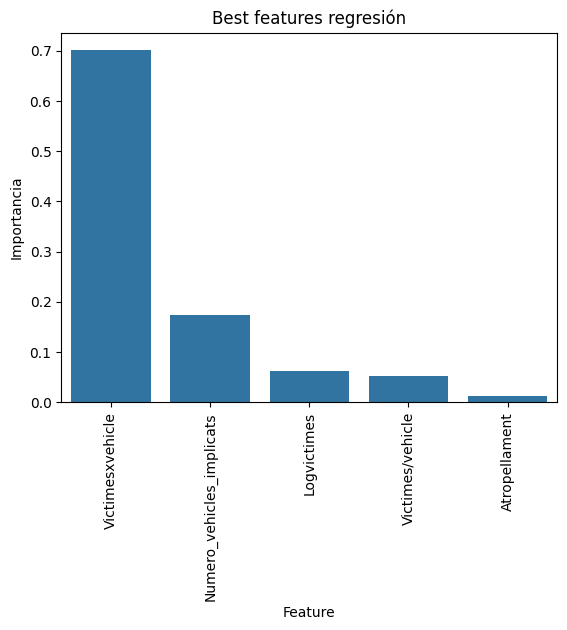

In [355]:
selector = rnd_reg_pipe.named_steps["selector"]
mask = selector.get_support()
selected_features = [name for name, selected in zip(X3.columns, mask) if selected]
importances = rnd_reg_pipe.named_steps["regressor"].feature_importances_
sns.barplot(pd.DataFrame({"Feature":selected_features,"Importancia":importances}).sort_values(by="Importancia",ascending=False), x = "Feature", y = "Importancia")
plt.title("Best features regresión")
plt.xticks(rotation = "vertical");

AttributeError: 'RandomForestRegressor' object has no attribute 'get_feature_names_out'

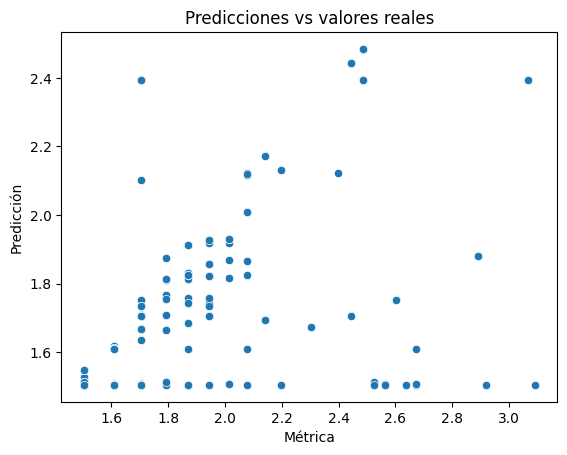

In [357]:
sns.scatterplot(x = y3_met_test, y = pred_reg)
plt.xlabel("Métrica")
plt.ylabel("Predicción")
plt.title("Predicciones vs valores reales");

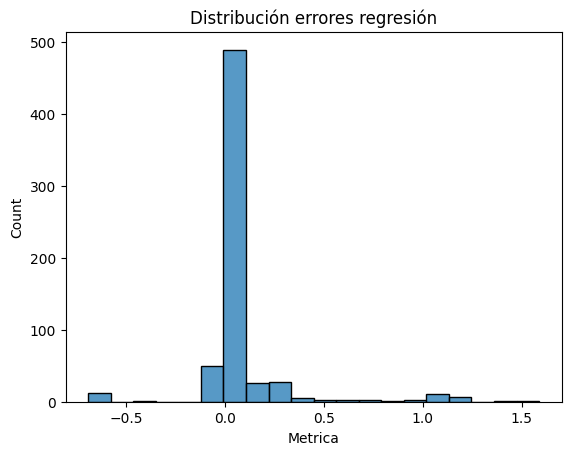

In [358]:
dif = y3_met_test-pred_reg

sns.histplot(dif,bins = 20)
plt.title("Distribución errores regresión");

In [343]:
clas = []
for i in pred_reg:
    clas.append(classifica5(i)-2)

In [344]:
clas

[0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,


In [359]:
pd.Series(clas).value_counts()

0    511
1     68
2     62
Name: count, dtype: int64

In [346]:
cat1.loc[y3_met_test.index,"Grau_emergencia"].value_counts()

Grau_emergencia
0    460
1    104
2     77
Name: count, dtype: int64

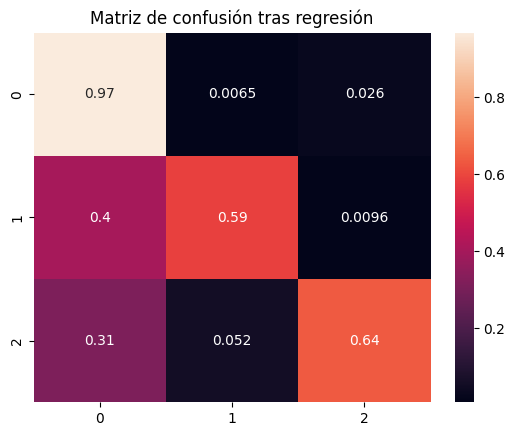

In [353]:
sns.heatmap(confusion_matrix(cat1.loc[y3_met_test.index,"Grau_emergencia"],clas, normalize="true"),annot =True)
plt.title("Matriz de confusión tras regresión");

### 3. Red neuronal con reparto de heridos leves, graves y fallecidos

In [360]:
X3.columns

Index(['Hora_dia', 'Numero_vehicles_implicats', 'Longitud', 'Latitud',
       'Altres', 'Creuar per fora pas de vianants', 'Desconegut',
       'Desobeir altres senyals', 'Desobeir el senyal del semàfor',
       'No és causa del vianant', 'Transitar a peu per la calçada', 'Abast',
       'Abast multiple', 'Altres_Vehicle', 'Atropellament',
       'Bolcada (més de dues rodes)', 'Caiguda (dues rodes)',
       'Caiguda interior vehicle', 'Col.lisió frontal',
       'Col.lisió fronto-lateral', 'Col.lisió lateral', 'Desconegut_Vehicle',
       'Encalç', 'Resta sortides de via', 'Sortida de via amb bolcada',
       'Sortida de via amb xoc o col.lisió', 'Xoc contra element estàtic',
       'Matí', 'Nit', 'Tarda', 'Ciutat Vella', 'Eixample', 'Gràcia',
       'Horta-Guinardó', 'Les Corts', 'Nou Barris', 'Sant Andreu',
       'Sant Martí', 'Sants-Montjuïc', 'Sarrià-Sant Gervasi', 'Laborable',
       'Dijous', 'Dilluns', 'Dimarts', 'Dimecres', 'Dissabte', 'Diumenge',
       'Divendres', 'Victimes

In [363]:
X5 = pd.concat((X2[["Numero_victimes"]],X3[["Numero_vehicles_implicats","Victimesxvehicle","Victimes/vehicle","Atropellament"]]), axis = 1)
X5

,Numero_victimes,Numero_vehicles_implicats,Victimesxvehicle,Victimes/vehicle,Atropellament
0,5.0,2.0,10.0,2.500000,0.0
1,4.0,1.0,4.0,4.000000,0.0
2,3.0,4.0,12.0,0.750000,0.0
3,2.0,2.0,4.0,1.000000,0.0
4,4.0,3.0,12.0,1.333333,0.0
...,...,...,...,...,...
3200,3.0,4.0,12.0,0.750000,0.0
3201,5.0,2.0,10.0,2.500000,0.0
3202,1.0,3.0,3.0,0.333333,0.0
3203,1.0,1.0,1.0,1.000000,0.0


In [418]:
target5 = [[]]
y5 = cat1[["Numero_morts","Numero_lesionats_greus","Numero_lesionats_lleus"]]
for i in y5.index:
    for j in range(len(y5.loc[i,:])):
        target5[i].append(y5.iloc[i,j])
        print(i,target5[i])
    target5.append([])
    target5[i+1] = []

target5.pop()
print(target5)

0 [np.float64(0.0)]
0 [np.float64(0.0), np.float64(1.0)]
0 [np.float64(0.0), np.float64(1.0), np.float64(4.0)]
1 [np.float64(1.0)]
1 [np.float64(1.0), np.float64(1.0)]
1 [np.float64(1.0), np.float64(1.0), np.float64(2.0)]
2 [np.float64(0.0)]
2 [np.float64(0.0), np.float64(0.0)]
2 [np.float64(0.0), np.float64(0.0), np.float64(3.0)]
3 [np.float64(0.0)]
3 [np.float64(0.0), np.float64(1.0)]
3 [np.float64(0.0), np.float64(1.0), np.float64(1.0)]
4 [np.float64(0.0)]
4 [np.float64(0.0), np.float64(0.0)]
4 [np.float64(0.0), np.float64(0.0), np.float64(4.0)]
5 [np.float64(0.0)]
5 [np.float64(0.0), np.float64(1.0)]
5 [np.float64(0.0), np.float64(1.0), np.float64(1.0)]
6 [np.float64(0.0)]
6 [np.float64(0.0), np.float64(0.0)]
6 [np.float64(0.0), np.float64(0.0), np.float64(5.0)]
7 [np.float64(0.0)]
7 [np.float64(0.0), np.float64(1.0)]
7 [np.float64(0.0), np.float64(1.0), np.float64(1.0)]
8 [np.float64(1.0)]
8 [np.float64(1.0), np.float64(1.0)]
8 [np.float64(1.0), np.float64(1.0), np.float64(0.0)]
9

In [419]:
len(target5)

3205

In [420]:
X5_train, X5_test, y5_train,y5_test = train_test_split(X5,target5, test_size=0.2, random_state=42)

In [421]:
y5_train

[[np.float64(1.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(4.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(3.0)],
 [np.float64(0.0), np.float64(1.0), np.float64(2.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(10.0)],
 [np.float64(0.0), np.float64(1.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(2.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(5.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(6.0)],
 [np.float64(1.0), np.float64(0.0), np.float64(0.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(1.0)],
 [np.float64(0.0), np.float64(1.0), np.float64(1.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(5.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(7.0)],
 [np.float64(0.0), np.float64(2.0), np.float64(1.0)],
 [np.float64(0.0), np.float64(0.0), np.float64(5.0)],
 [np.float64(0.0), np.float64(1.0), np.float64(1.0)],
 [np.float64(1.0), np.float64(0.0), np.float64(1.0)],
 [np.float64(0.0), np.float

In [450]:
capas2 = [
    keras.Input((5,)),
    keras.layers.Dense(units = 10, activation='relu'),
    # keras.layers.Dense(units = 5,activation="sigmoid"),
    # keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 3)
]

model2 = keras.models.Sequential(capas2)

In [453]:
model2.compile(
    optimizer = "sgd",
    loss = "mse",
    metrics = ["mae"]
)

In [454]:
model2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [455]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model_reg.keras")


history2 = model2.fit(
    X5_train,
    y5_train,
    batch_size = 128,
    epochs = 100,
    validation_split = 0.1,
    callbacks = [early_stopping_cb, checkpoint_cb]
)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed